# STBDA2023 09wk-1: 중간고사_sy

GUEBIN CHOI  
2023-11-15

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from plotnine import * 
#---#
import PIL
import io 
import requests
import cv2 

# 1. 에너지사용량 – 80점

아래는 2019년 서울의 에너지사용량을 불러오는 예시코드이다.

In [2]:
pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2019.csv')

에너지 사용량은 2018년부터 2021년까지의 기간 동안 서울, 부산 등 여러
지역에 대해 정리되어 있으며, 아래 주소 형식으로 저장되어 있다.

    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2018.csv
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2019.csv
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2020.csv
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2021.csv
    ...
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2018.csv
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2019.csv
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2020.csv
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2021.csv

아래의 `url`, `prov`를 참고하여 모든 자료를 불러온 뒤 `pd.concat()`을
이용하여 하나의 df로 합쳐라.

In [3]:
url = 'https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/{}.csv'

prov = ['Seoul', 'Busan', 'Daegu', 'Incheon', 
        'Gwangju', 'Daejeon', 'Ulsan', 'Sejongsi', 
        'Gyeonggi-do', 'Gangwon-do', 'Chungcheongbuk-do', 
        'Chungcheongnam-do', 'Jeollabuk-do', 'Jeollanam-do', 
        'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do']

years = ['2018', '2019', '2020','2021']

dfs = []

for region in prov:
    for year in years:
        region_year_url = url.format(f"{region}{year}")
        df = pd.read_csv(region_year_url)
        df.insert(0, '년도', int(year))
        df.insert(1, '시도', region)
        dfs.append(df)

In [4]:
result_df = pd.concat(dfs, ignore_index=True)

In [5]:
result_df

1000 rows × 8 columns

의미상 숫자형이지만 문자형으로 입력이된 자료를 모두 전처리하고, 아래의
딕셔너리를 이용하여 열의 이름을 변환하라.

In [6]:
name_dict = {
    '년도': 'Year',
    '시도': 'Prov',
    '지역': 'Reg',
    '건물동수': 'BldgCount',
    '연면적': 'Area',
    '에너지사용량(TOE)/전기': 'Elec',
    '에너지사용량(TOE)/도시가스': 'Gas',
    '에너지사용량(TOE)/지역난방': 'Heat'
}

In [7]:
result_df.dtypes

년도                   int64
시도                  object
지역                  object
건물동수                object
연면적                 object
에너지사용량(TOE)/전기      object
에너지사용량(TOE)/도시가스    object
에너지사용량(TOE)/지역난방    object
dtype: object

In [8]:
result_df.rename(columns=name_dict, inplace=True)

In [9]:
result_df

1000 rows × 8 columns

In [10]:
num_var = {'BldgCount', 'Area', 'Elec', 'Gas', 'Heat'}

In [11]:
for i in num_var:
    result_df[i] = result_df[i].apply(lambda x: x if x == 0 else str(x).replace(',', ''))

In [12]:
result_df.dtypes

Year          int64
Prov         object
Reg          object
BldgCount    object
Area         object
Elec         object
Gas          object
Heat         object
dtype: object

In [13]:
for i in num_var:
    result_df[i] = pd.to_numeric(result_df[i], errors='coerce')

In [14]:
result_df.dtypes

Year          int64
Prov         object
Reg          object
BldgCount     int64
Area          int64
Elec          int64
Gas           int64
Heat          int64
dtype: object

In [15]:
result_df

1000 rows × 8 columns

올바르게 정리된 데이터프레임의 예시는 아래와 같다.

------------------------------------------------------------------------

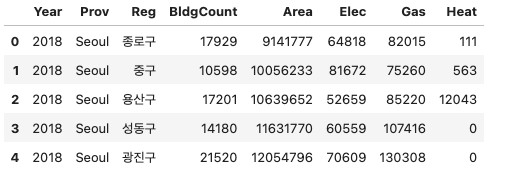

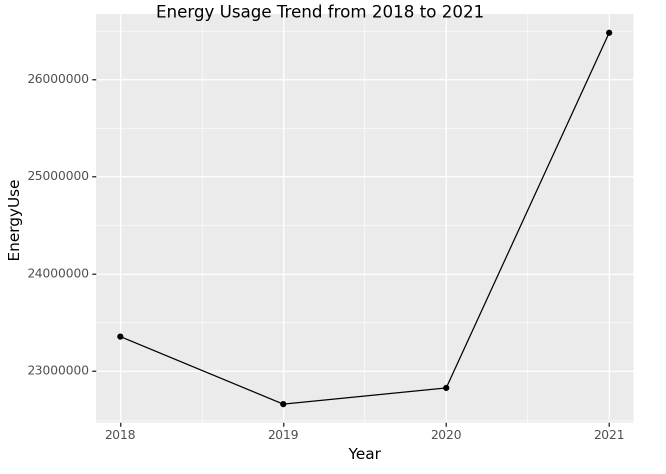\##
`(1)` 에너지 사용 추세 – 10점

2018년부터 2021년까지 에너지사용량을 dot-connected plot으로 시각화 하라.

**시각화 예시**

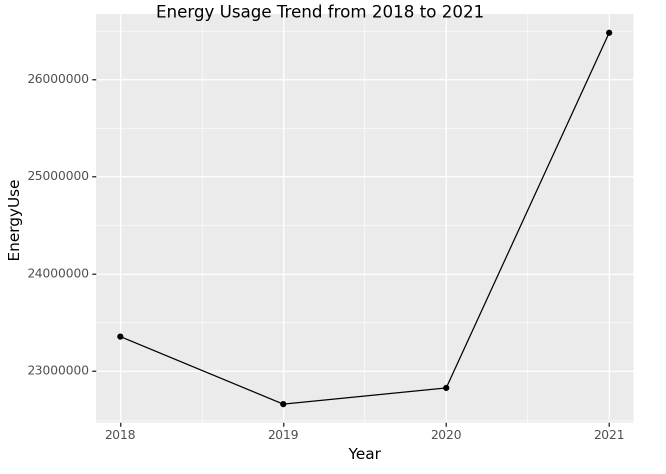

**세부지침**

`1`. plotnine으로 생성된 `fig`\[1\]에 `.draw()`메소드를 사용하여
`matplotlib.figure.Figure` 자료형으로 변환할것

\[1\] type이 `plotnine.ggplot.ggplot` 인 오브젝트

In [16]:
result_df.groupby('Year')['Elec', 'Gas', 'Heat'].sum().reset_index().assign(EnergyUse=lambda x: x['Elec'] + x['Gas'] + x['Heat'])

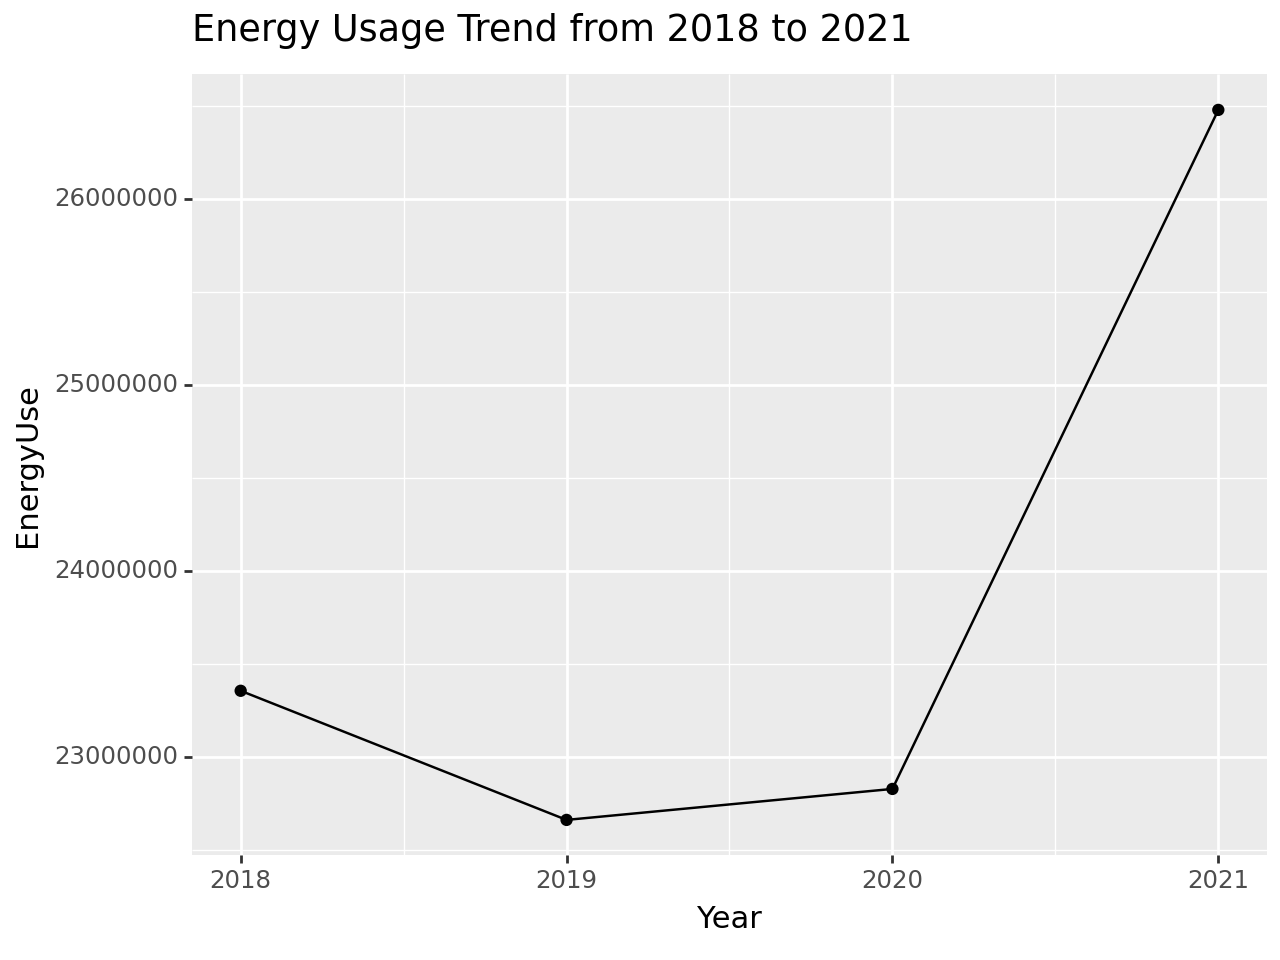

In [20]:
p = ggplot(result_df.groupby('Year')['Elec','Gas','Heat'].sum().reset_index().assign(EnergyUse=lambda x: x['Elec'] + x['Gas'] + x['Heat']), aes(x="Year", y="EnergyUse")) + geom_point() + geom_line()
p = p + labs(title="Energy Usage Trend from 2018 to 2021")
p.draw()

## `(2)` 에너지 종류별 사용 추세 – 10점

2018년부터 2021년까지 에너지사용량을 dot-connected plot으로 시각화 하라.
에너지의 유형은 색상으로 구분하라.

**시각화 예시**

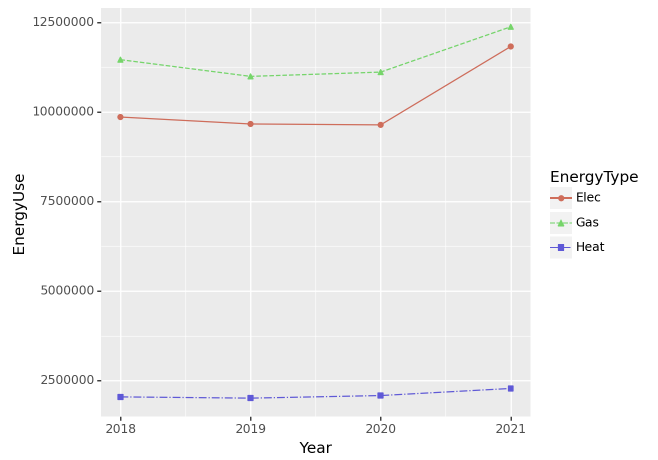

**세부지침**

`1` `geom_point`의 color와 shape을 `EneryType`으로 설정할 것.

`2` `geom_line`의 color와 linetype을 `EneryType`으로 설정할 것

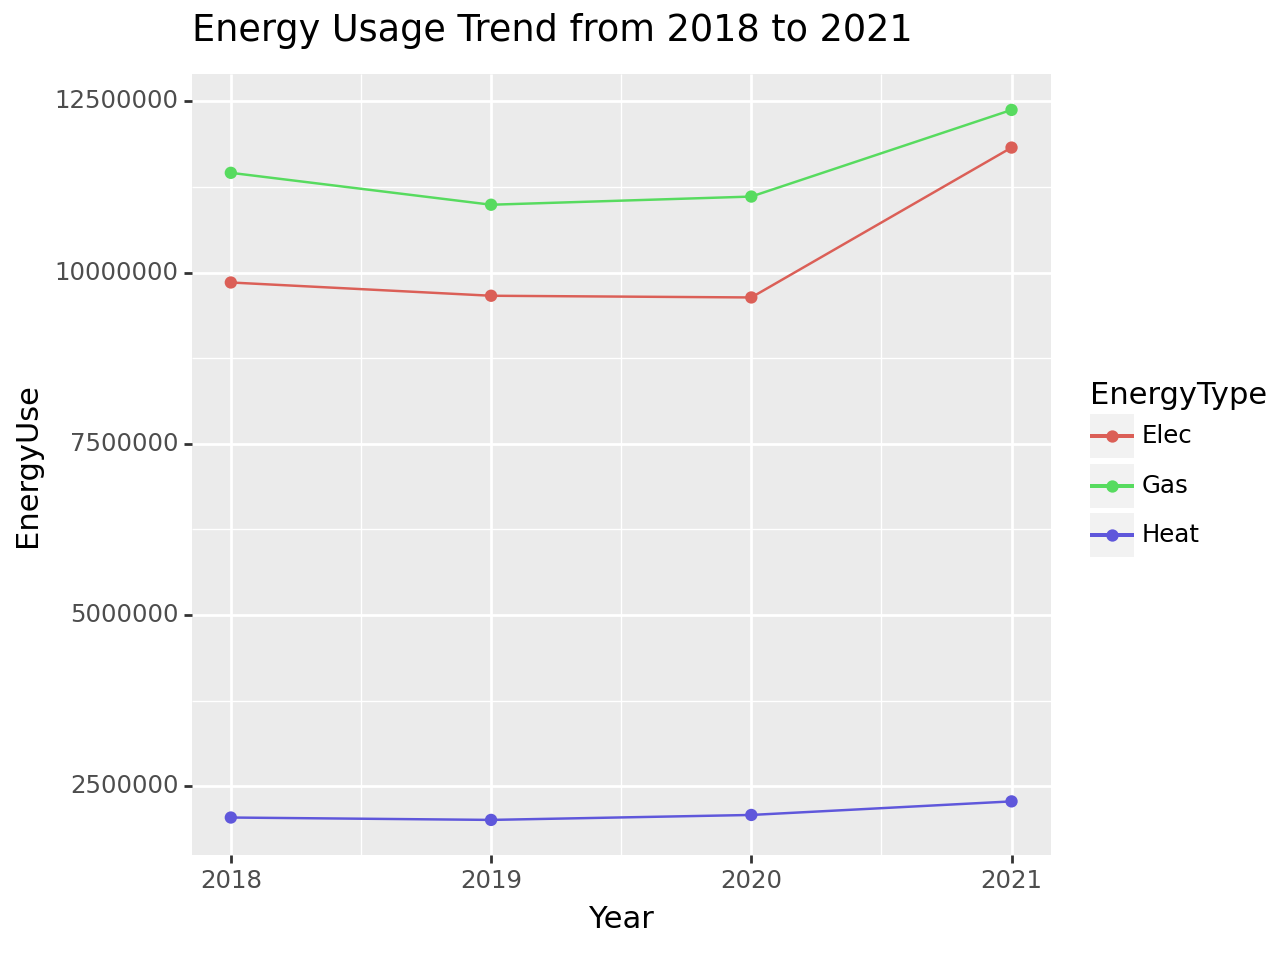

In [51]:
p = ggplot(pd.melt(result_df.groupby('Year')['Elec', 'Gas', 'Heat'].sum().reset_index(),\
                   id_vars=['Year'], var_name='EnergyType', value_name='EnergyUse'), aes(x='Year', y='EnergyUse', color='EnergyType')) +\
                geom_point() + geom_line()
p = p + labs(title="Energy Usage Trend from 2018 to 2021")
p.draw()

## `(3)` 2020년 대비 2021년의 전기에너지 사용량 증가 – 20점

2020년 대비 2021년의 전기에너지 사용량이 증가한 상위 5개의 지역을 아래와
같이 시각화하라.

**시각화 예시**

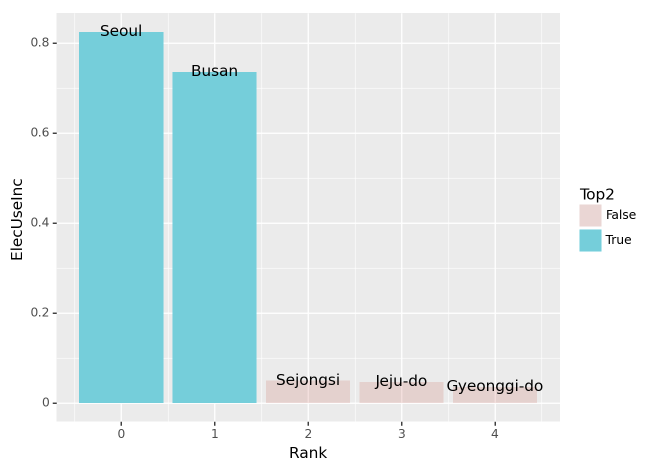

**세부지침**

`1`. 2020년 대비 2021년의 전기에너지 사용 증가량은 아래와 같이 구한다.

$$\text{서울의 전기에너지 사용 증가량} = \frac{\text{2021년 서울 전기에너지 사용량}-\text{2020년 서울 전기에너지 사용량}}{\text{2020년 서울 전기에너지 사용량}}$$

-   $\text{서울의 2021년 전기에너지 사용 증가량}= \text{2021년 강남구의 전기에너지 사용량} + \dots + \text{2021년 중랑구의 전기에너지 사용량}$
-   $\text{서울의 2020년 전기에너지 사용 증가량}= \text{2020년 강남구의 전기에너지 사용량} + \dots + \text{2020년 중랑구의 전기에너지 사용량}$

In [139]:
pd.DataFrame([result_df.query("Year == 2020 or Year == 2021").groupby(['Prov','Year'])['Elec'].sum().unstack().reset_index().iloc[:,0],\
    result_df.query("Year == 2020 or Year == 2021").groupby(['Prov','Year'])['Elec'].sum().unstack().diff(axis=1).reset_index().iloc[:,2]/ \
    result_df.query("Year == 2020 or Year == 2021").groupby(['Prov','Year'])['Elec'].sum().unstack().reset_index().iloc[:,1]]).transpose().rename(columns={'Unnamed 0': 'ElectricUseInc'})

`2`. 전기에너지의 사용량이 증가한 상위5개의 지역 중 가장 많이 증가한
2개의 지역은 색깔과 투명도로 하이라이팅 한다. (구체적 코드는 hint를
참고할 것)

**힌트**

`-` 정리된 자료의 형태는 아래와 같아야 한다.

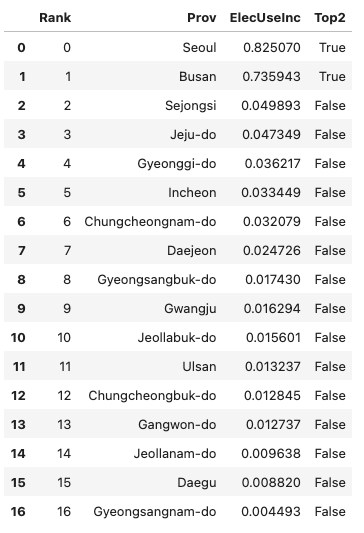

`-` 그림안에 text를 넣기위해서 `geom_text`를 시용한다. 위의 데이터가
정리되었다는 전제하에 구체적인 시각화 코드는 아래와 같다.

``` python
fig = ggplot(tidydata.query('Rank<5'))
col = geom_col(aes(x='Rank',y='ElecUseInc',fill='Top2',alpha='Top2'))
text = geom_text(aes(x='Rank',y='ElecUseInc',label='Prov'))
fig + col + text + scale_alpha_manual(values={True: 1, False: 0.2})
```

In [156]:
pd.DataFrame([result_df.query("Year == 2020 or Year == 2021").groupby(['Prov','Year'])['Elec'].sum().unstack().reset_index().iloc[:,0],\
    result_df.query("Year == 2020 or Year == 2021").groupby(['Prov','Year'])['Elec'].sum().unstack().diff(axis=1).reset_index().iloc[:,2]/ \
    result_df.query("Year == 2020 or Year == 2021").groupby(['Prov','Year'])['Elec'].sum().unstack().reset_index().iloc[:,1]]).transpose().rename(columns={'Unnamed 0': 'ElectricUseInc'}).\
    assign(Rank=lambda x: x['ElectricUseInc'].rank(ascending=False), Top2=lambda x: x['ElectricUseInc'].rank(ascending=False) <= 2).sort_values(by='Rank')

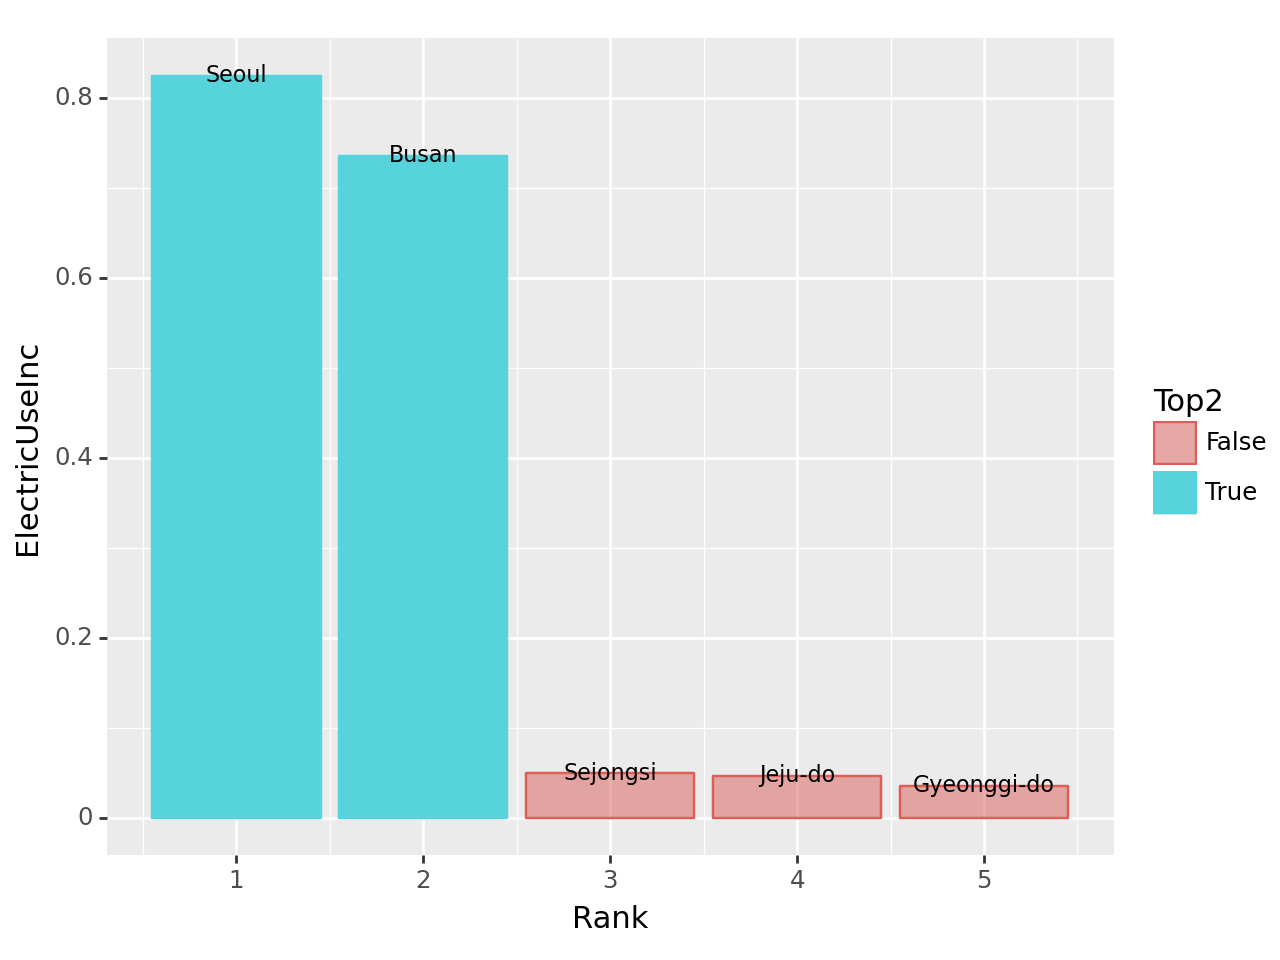

In [203]:
p = ggplot(pd.DataFrame([result_df.query("Year == 2020 or Year == 2021").groupby(['Prov','Year'])['Elec'].sum().unstack().reset_index().iloc[:,0],\
    result_df.query("Year == 2020 or Year == 2021").groupby(['Prov','Year'])['Elec'].sum().unstack().diff(axis=1).reset_index().iloc[:,2]/ \
    result_df.query("Year == 2020 or Year == 2021").groupby(['Prov','Year'])['Elec'].sum().unstack().reset_index().iloc[:,1]]).transpose().rename(columns={'Unnamed 0': 'ElectricUseInc'}).\
    assign(Rank=lambda x: x['ElectricUseInc'].rank(ascending=False), Top2=lambda x: x['ElectricUseInc'].rank(ascending=False) <= 2).sort_values(by='Rank').head(5).\
            astype({'ElectricUseInc': 'float'}) ,\
           aes(x='Rank', y='ElectricUseInc', color='Top2', fill='Top2')) +\
    scale_alpha_manual(values={True: 1, False: 0.5})+\
                geom_bar(aes(alpha='Top2'),stat='identity')+\
                 geom_text(aes(label='Prov'), position='identity', size=8, color='black') +\
                scale_y_continuous(breaks=[0, 0.2, 0.4, 0.6, 0.8])
p.draw()

## `(4)` 건물당 에너지 소비량: 연도별 상위 15구 비교 – 20점

건물당 에너지소비량이 가장 큰 15개의 구를 연도별로 시각화하라.

**시각화 예시**

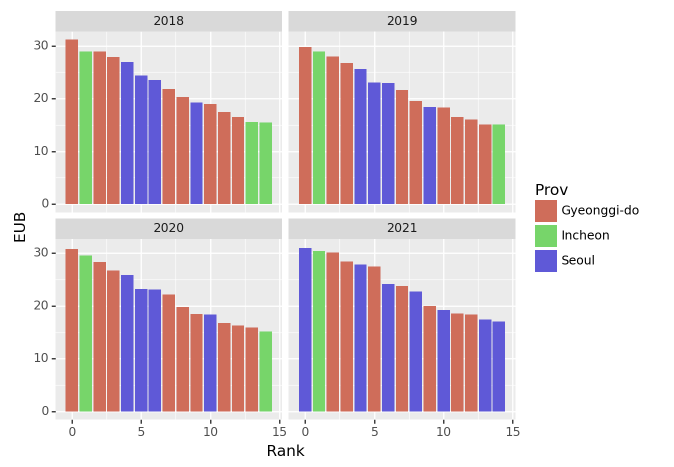

**세부지침**

`1`. 건물당 에너지 사용량(=EUB)을 아래와 같은 방식으로 구할 것

$$\text{EUB}_{강남구,2018}=\frac{\text{강남구의 2018년도 전기에너지 사용량}+ \text{강남구의 2018년도 도시가스 사용량} +\text{강남구의 2018년도 지역난방 사용량}}{\text{강남구의 2018년도 건물동수}}$$

`2`. 연도별로 EUB가 높은 15개의 구를 정렬할 것. (따라서 매년도마다
순위가 다를수 있음)

In [266]:
result_df.groupby(['Year','Prov','Reg']).sum().reset_index().assign(EUB = lambda x: (x['Elec']+x['Gas']+x['Heat'])/x['BldgCount'],\
                                                             Rank = lambda x: x.groupby('Year')['EUB'].rank(ascending=False)).sort_values(by=['Year','Rank']).\
            query('Rank<=15').head()

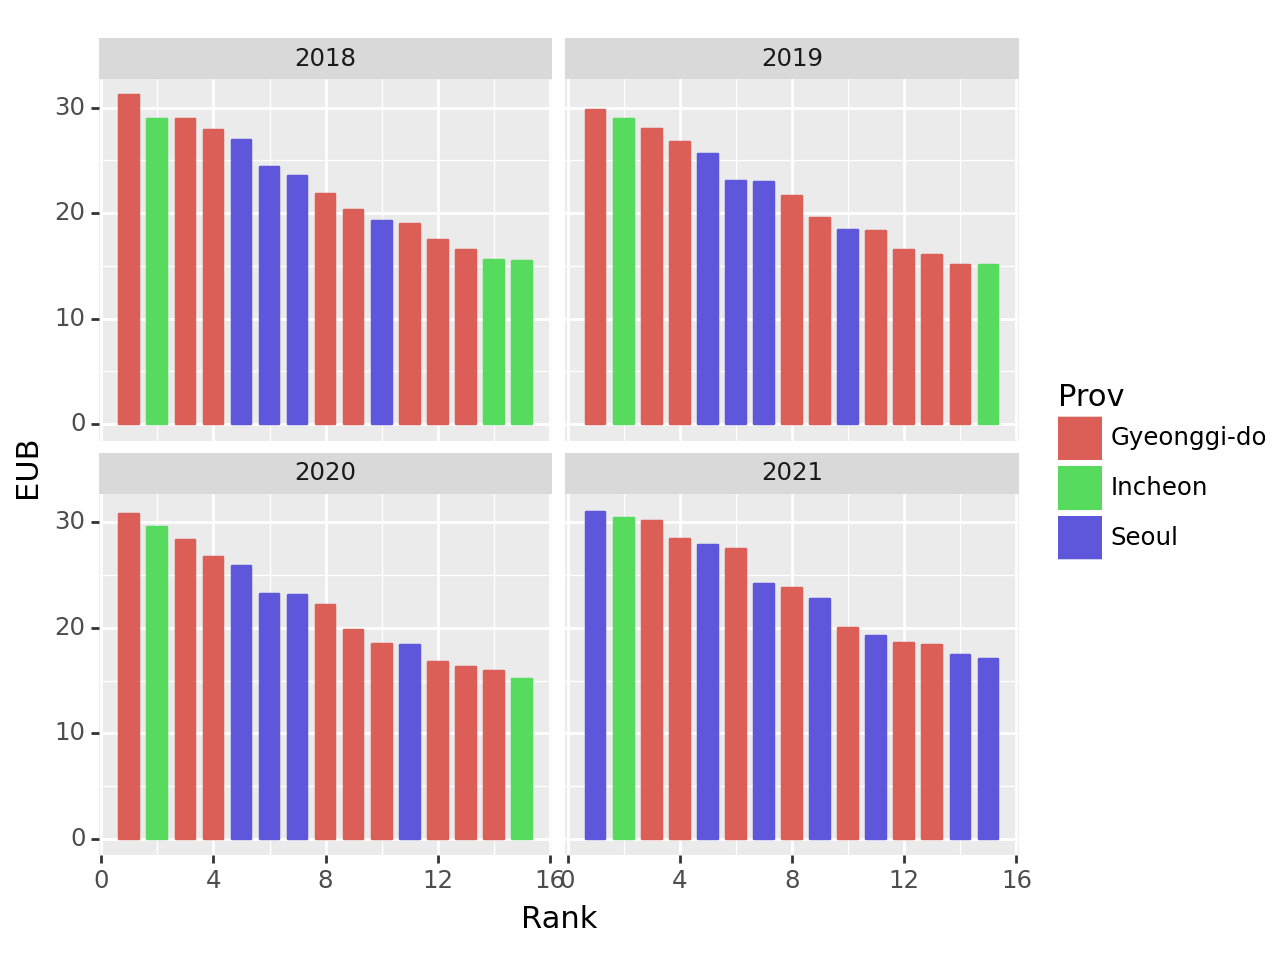

In [268]:
p = ggplot(result_df.groupby(['Year','Prov','Reg']).sum().reset_index().assign(EUB = lambda x: (x['Elec']+x['Gas']+x['Heat'])/x['BldgCount'],\
                                                             Rank = lambda x: x.groupby('Year')['EUB'].rank(ascending=False)).sort_values(by=['Year','Rank']).\
            query('Rank<=15'),\
           aes(x = 'Rank',y='EUB' , color='Prov',fill='Prov')) +\
                geom_bar(stat='identity',width=0.7) +\
        facet_wrap('Year')
p.draw()

## `(5)` 수도권과 비수도권의 전기 에너지 사용량 및 사용 비율 – 20점

수도권과 비수도권의 전기에너지 사용량 및 사용비율을 계산하고 시각화
하라.

**시각화예시**

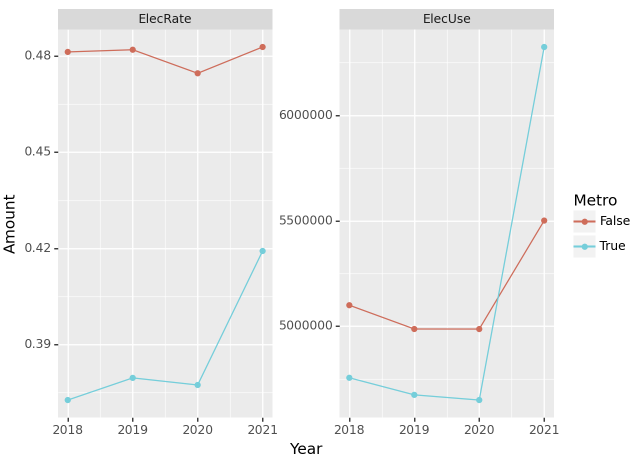

**세부지침**

`1`. `['Seoul','Gyeonggi-do','Incheon']`은 수도권으로 그 외의 지역은
비수도권으로 분리한다.

`2`. 수도권의 전기에너지 사용비율은 아래와 같이 구한다.

$$\text{2018년 수도권의 전기에너지 사용비율} = \frac{\text{2018년 수도권의 전기 사용량}}{\text{2018년 수도권의 전기 사용량}+\text{2018년 수도권의 도시가스 사용량}+\text{2018년 수도권의 지역난방 사용량}}$$

`3`. `facet_wrap` 사용시 `scales='free'` 옵션을 사용할 것

In [426]:
pd.melt(result_df.assign(Metro=result_df['Prov'].isin(['Seoul', 'Gyeonggi-do', 'Incheon'])).\
        groupby(['Year','Metro']).sum().reset_index().assign(ElecUse = lambda x: (x['Elec']+x['Gas']+x['Heat']),\
                                                            ElecRate = lambda x: x['Elec']/(x['Elec']+x['Gas']+x['Heat'])).\
        iloc[:, [0, 1, 7, 8]],id_vars=['Year','Metro'], value_name='Amount')

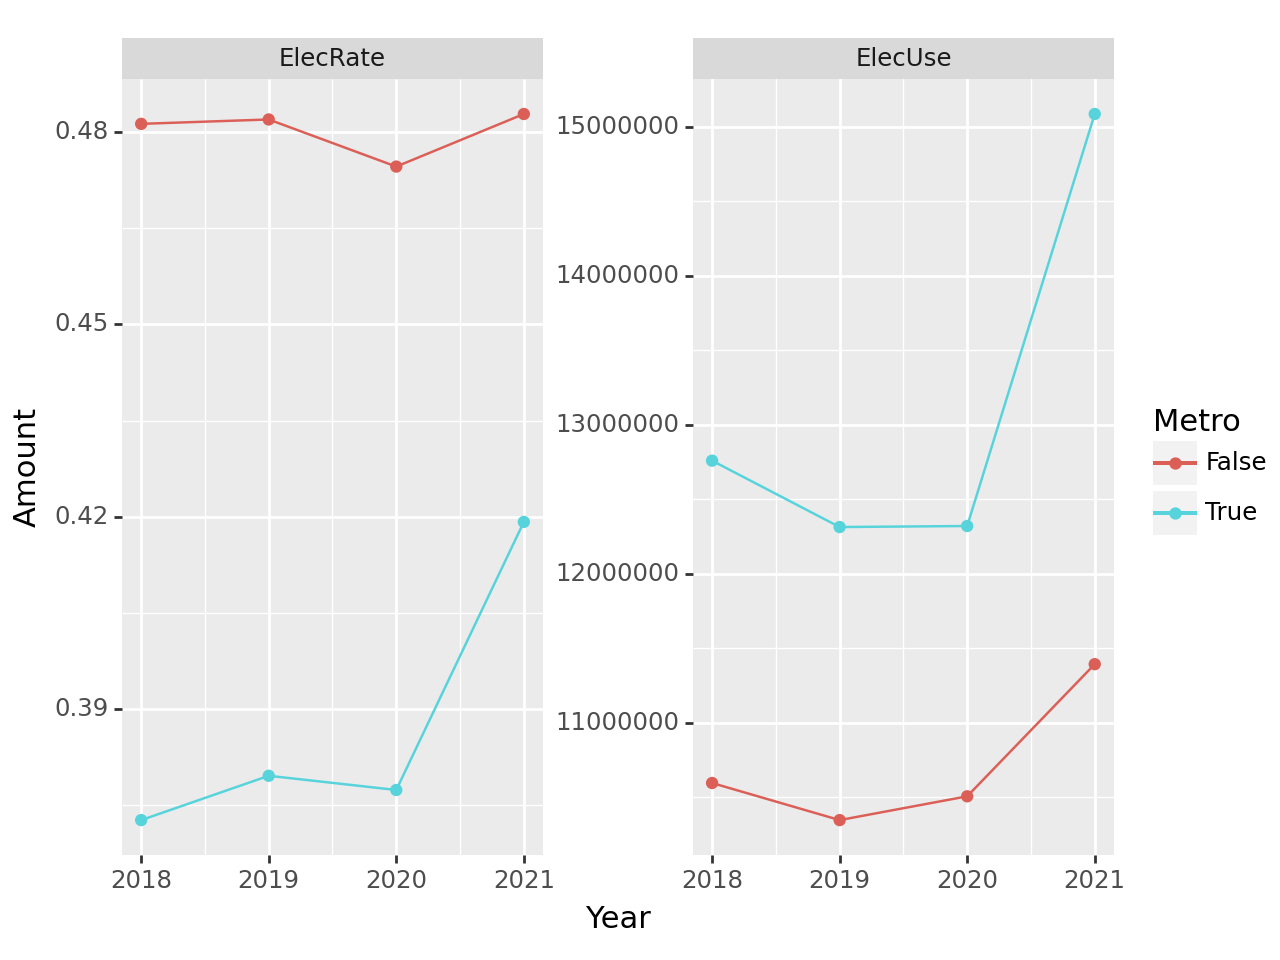

In [436]:
p = ggplot(pd.melt(result_df.assign(Metro=result_df['Prov'].isin(['Seoul', 'Gyeonggi-do', 'Incheon'])).\
        groupby(['Year','Metro']).sum().reset_index().assign(ElecUse = lambda x: (x['Elec']+x['Gas']+x['Heat']),\
                                                            ElecRate = lambda x: x['Elec']/(x['Elec']+x['Gas']+x['Heat'])).\
        iloc[:, [0, 1, 7, 8]],id_vars=['Year','Metro'], value_name='Amount'),aes(x='Year',y='Amount',color='Metro')) +\
        geom_line() + geom_point() + \
        facet_wrap('variable', scales = "free_y") 
p.draw()

# 2. FIFA – 90점

아래는 FIFA22 자료를 불러오는 코드이다.

In [437]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2021/master/_notebooks/2021-10-25-FIFA22_official_data.csv').drop(['Loaned From','Marking'],axis=1).dropna()
df.head()

5 rows × 63 columns

아래의 딕셔너리를 이용하여 `Position`열을 변환하고 물음에 답하라.

In [438]:
position_dict = {
    'GOALKEEPER':{'GK'},
    'DEFENDER':{'CB','RCB','LCB','RB','LB','RWB','LWB'},
    'MIDFIELDER':{'CM','RCM','LCM','CDM','RDM','LDM','CAM','RAM','LAM','RM','LM'},
    'FORWARD':{'ST','CF','RF','LF','RW','LW','RS','LS'},
    'SUB':{'SUB'},
    'RES':{'RES'}
}
position_dict

{'GOALKEEPER': {'GK'},
 'DEFENDER': {'CB', 'LB', 'LCB', 'LWB', 'RB', 'RCB', 'RWB'},
 'MIDFIELDER': {'CAM',
  'CDM',
  'CM',
  'LAM',
  'LCM',
  'LDM',
  'LM',
  'RAM',
  'RCM',
  'RDM',
  'RM'},
 'FORWARD': {'CF', 'LF', 'LS', 'LW', 'RF', 'RS', 'RW', 'ST'},
 'SUB': {'SUB'},
 'RES': {'RES'}}

In [569]:
def map_position(position):
    for category, positions in position_dict.items():
        if position in positions:
            return category
    return 'UNKNOWN'

In [570]:
df.assign(Position_Category = lambda x: x['Position'].str.split('>').str[1].str.strip().apply(map_position))

14398 rows × 64 columns

## `(1)` 나이와 포지션에 따른 선수 가치 및 급여 분석 – 10점

나이에 따른 선수가치(Value)와 급여(Wage)의 산점도를 포지션별로 시각화
하고 추세선을 그려라.

**시각화 예시**

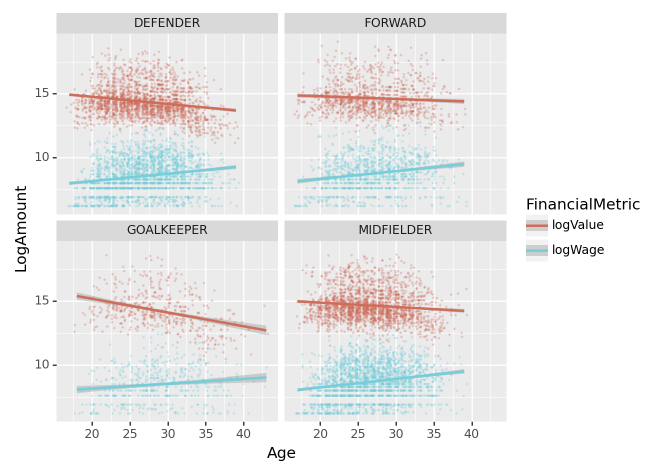

**세부지침**

`1`. `Value`와 `Wage`는 log값을 취하여 시각화 하라.

`2`. `geom_point`를 사용할 시`alpha=0.2`, `size=0.1`,
`position='jitter'`로 설정하라.

`3`. `SUB`와 `RES` 포지션은 제외하고 시각화 할 것

In [571]:
pd.melt(df.assign(Position_Category = lambda x: x['Position'].str.split('>').str[1].str.strip().apply(map_position),
            logValue = np.log(df['Value'].str.split('€').str[1].str.strip().\
                        apply(lambda x: float(x.replace('€', '').strip()[:-1]) * 1000000 \
                              if x.endswith('M') else float(x.replace('€', '').strip()[:-1]) * 1000 \
                              if x.endswith('K') else float(x))),
         logWage = np.log(df['Wage'].str.split('€').str[1].str.strip().\
                        apply(lambda x: float(x.replace('€', '').strip()[:-1]) * 1000000 \
                              if x.endswith('M') else float(x.replace('€', '').strip()[:-1]) * 1000 \
                              if x.endswith('K') else float(x))))\
        [['Position_Category','Age', 'logValue', 'logWage']],id_vars=['Position_Category','Age'],var_name='FinancialMetric',value_name='LogAmount').\
        query('Position_Category not in ["SUB","RES"]')

11986 rows × 4 columns

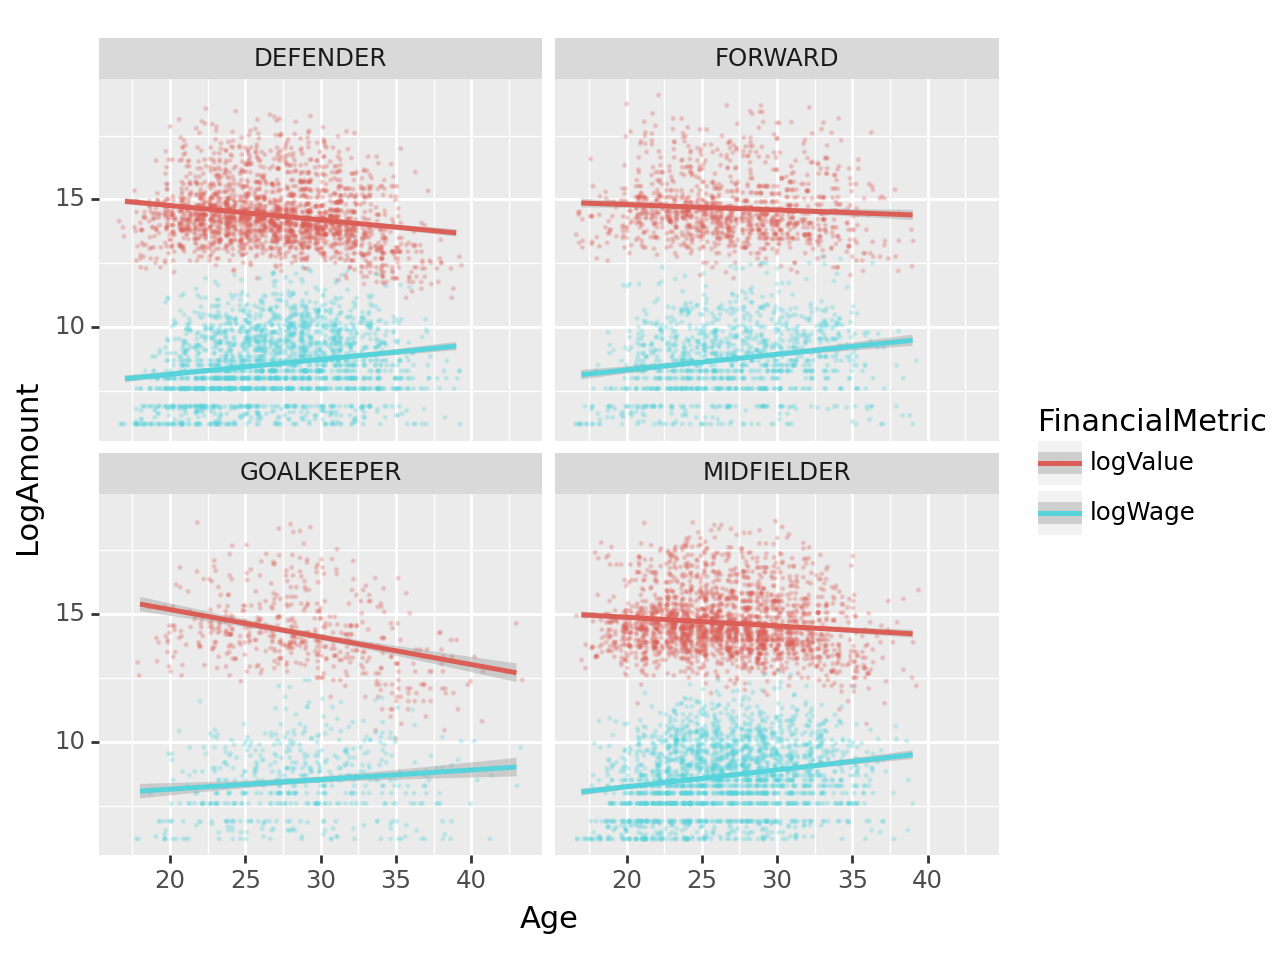

In [572]:
p = ggplot(pd.melt(df.assign(Position_Category = lambda x: x['Position'].str.split('>').str[1].str.strip().apply(map_position),
            logValue = np.log(df['Value'].str.split('€').str[1].str.strip().\
                        apply(lambda x: float(x.replace('€', '').strip()[:-1]) * 1000000 \
                              if x.endswith('M') else float(x.replace('€', '').strip()[:-1]) * 1000 \
                              if x.endswith('K') else float(x))),
         logWage = np.log(df['Wage'].str.split('€').str[1].str.strip().\
                        apply(lambda x: float(x.replace('€', '').strip()[:-1]) * 1000000 \
                              if x.endswith('M') else float(x.replace('€', '').strip()[:-1]) * 1000 \
                              if x.endswith('K') else float(x))))\
        [['Position_Category','Age', 'logValue', 'logWage']],id_vars=['Position_Category','Age'],var_name='FinancialMetric',value_name='LogAmount').\
        query('Position_Category not in ["SUB","RES"]'),\
           aes(x='Age',y='LogAmount',color='FinancialMetric')) +\
    geom_point(alpha=0.2, size=0.1, position='jitter') + geom_smooth()+\
    facet_wrap('Position_Category')
p.draw()

## `(2)` 골키퍼 능력치별 로그급여 추세 – 10점

아래의 리스트는 골키퍼와 관련된 능력치이다.

In [573]:
gkstats = ['GKDiving','GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
gkstats

['GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

`gkstats` 에 해당하는 능력치와 로그급여(`logWage`)를 산점도로 시각화하고
추세선을 추가하라.

**시각화예시**

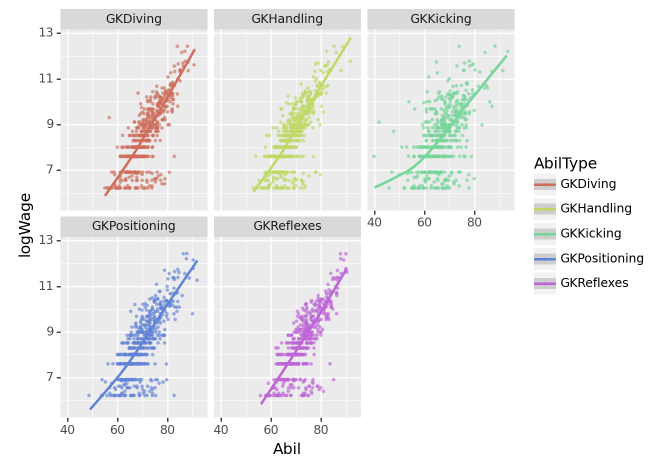

**세부지침**

`1`. 포지션이 “골키퍼”인 선수에 한정하여 시각화 할 것

`2`. `geom_point`를 사용할 시 `alpha=0.5`,`size=0.5`,`position='jitter'`
를 설정하라.

In [671]:
pd.melt(df.assign(logWage = np.log(df['Wage'].str.split('€').str[1].str.strip().\
                            apply(lambda x: float(x.replace('€', '').strip()[:-1]) * 1000000 \
                                  if x.endswith('M') else float(x.replace('€', '').strip()[:-1]) * 1000 \
                                  if x.endswith('K') else float(x))),
         Position_Category = lambda x: x['Position'].str.split('>').str[1].str.strip().apply(map_position),
                 ).query('Position_Category=="GOALKEEPER"')[['logWage']+gkstats],\
                id_vars='logWage',var_name='AbilType',value_name='Abil')

2535 rows × 3 columns

/home/csy/anaconda3/envs/temp_csy/lib/python3.8/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/csy/anaconda3/envs/temp_csy/lib/python3.8/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/csy/anaconda3/envs/temp_csy/lib/python3.8/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/csy/anaconda3/envs/temp_csy/lib/python3.8/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/csy/anaconda3/envs/temp_csy/lib/python3.8/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.

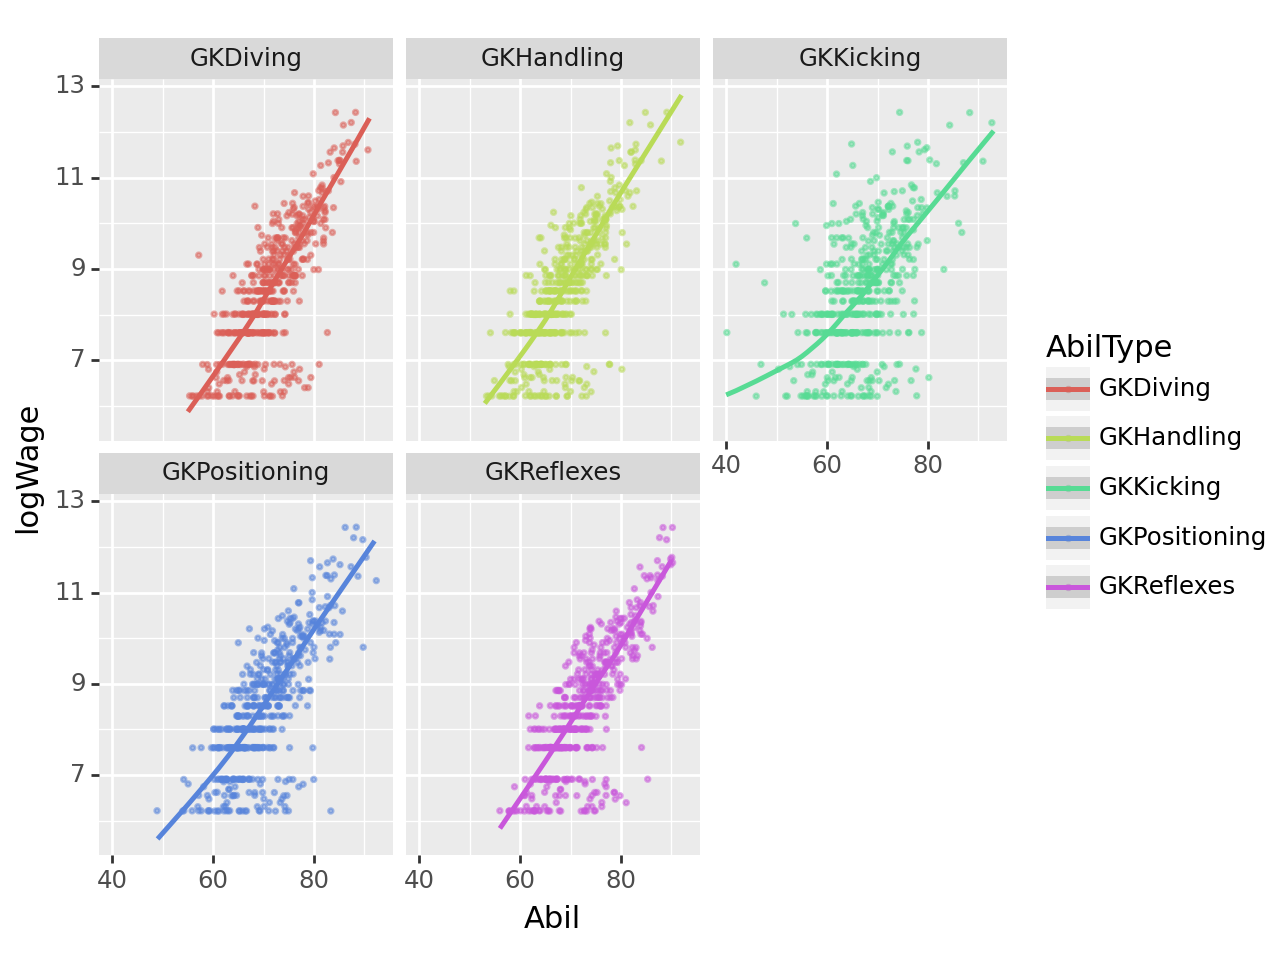

In [672]:
p = ggplot(pd.melt(df.assign(logWage = np.log(df['Wage'].str.split('€').str[1].str.strip().\
                            apply(lambda x: float(x.replace('€', '').strip()[:-1]) * 1000000 \
                                  if x.endswith('M') else float(x.replace('€', '').strip()[:-1]) * 1000 \
                                  if x.endswith('K') else float(x))),
         Position_Category = lambda x: x['Position'].str.split('>').str[1].str.strip().apply(map_position),
                 ).query('Position_Category=="GOALKEEPER"')[['logWage']+gkstats],\
                id_vars='logWage',var_name='AbilType',value_name='Abil'),
           aes(x='Abil',y='logWage',color='AbilType'))+\
    geom_point(alpha=0.5,size=0.5,position='jitter') + geom_smooth() + \
    facet_wrap('~AbilType')
p.draw()

## `(3)` “GKAbility”에 따른 골키퍼의 Overall 예측 – 20점

아래의 리스트는 골키퍼와 관련된 능력치이다.

In [705]:
gkstats = ['GKDiving','GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
gkstats

['GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

`gkstats` 에 해당하는 능력치의 평균을 계산하고 `GKAbility`라는 변수에
저장하라. 골키퍼 포지션과 공격수 포지션을 가지는 선수들에 한정하여
`GKAbility`와 `OveraAll`(=선수의 전반적 능력치)의 관계를 산점도로
시각화하라.

**시각화 예시**

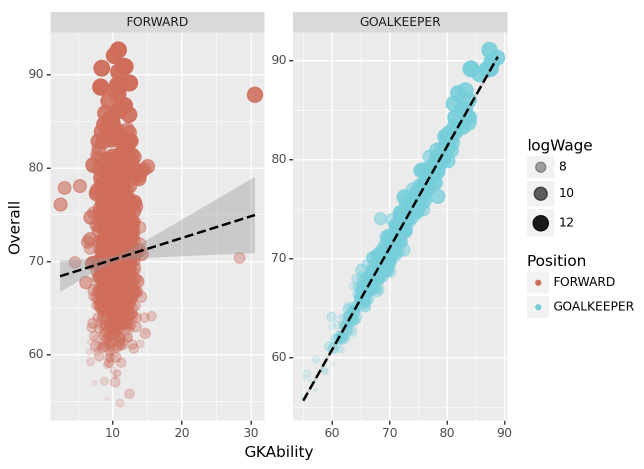

**세부지침**

`1`. `ID=212198`인 선수 `Bruno Fernandes`의 경우 `GKAbility`를 아래와
같이 계산할 수 있다.

$$\text{Bruno Fernandes의 GKAbility} = \frac{\text{Bruno Fernandes의 GKDiving} + \dots + \text{Bruno Fernandes의 GKReflexes}}{5}$$

`2`. 시각화를 위한 세부옵션은 아래의 코드를 참고하라.

``` python
fig = ggplot(tidydata)
point = geom_point(aes(x='GKAbility',y='Overall',size='logWage',alpha='logWage',color='Position'),position='jitter')
smooth = geom_smooth(aes(x='GKAbility',y='Overall'),linetype='dashed')
facet = facet_wrap('Position',scales='free')
fig + point + smooth + facet
```

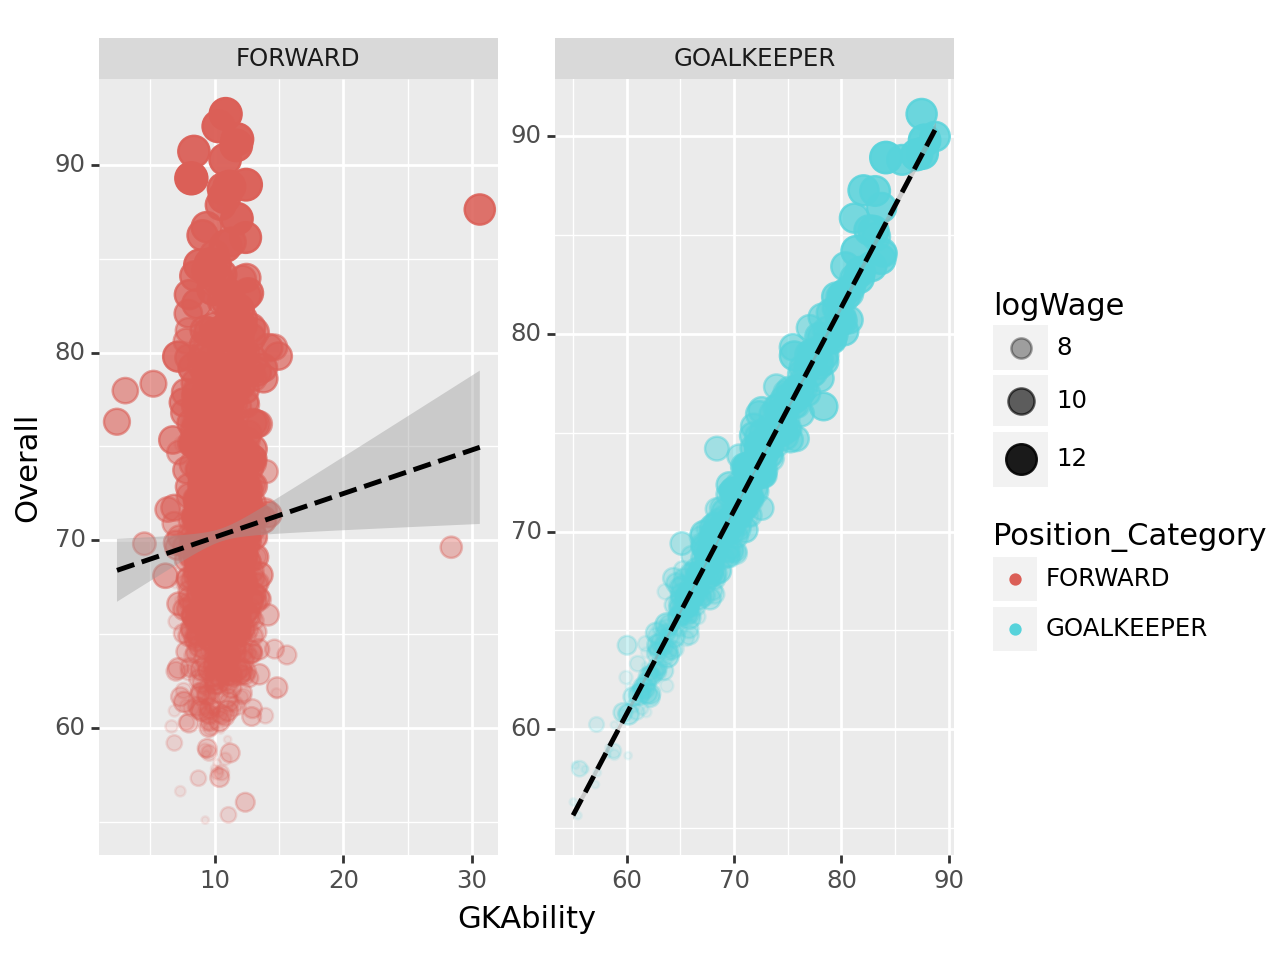

In [811]:
fig = ggplot(df.assign(logWage = np.log(df['Wage'].str.split('€').str[1].str.strip().\
                            apply(lambda x: float(x.replace('€', '').strip()[:-1]) * 1000000 \
                                  if x.endswith('M') else float(x.replace('€', '').strip()[:-1]) * 1000 \
                                  if x.endswith('K') else float(x))),
          Position_Category = lambda x: x['Position'].str.split('>').str[1].str.strip().apply(map_position)).\
    query('Position_Category in ["GOALKEEPER","FORWARD"]').\
           assign(GKAbility = lambda x: x[gkstats].mean(axis=1)))
point = geom_point(aes(x='GKAbility',y='Overall',size='logWage',alpha='logWage',color='Position_Category'),position='jitter')
smooth = geom_smooth(aes(x='GKAbility',y='Overall'),linetype='dashed')
facet = facet_wrap('Position_Category',scales='free')
fig + point + smooth + facet

## `(4)` 포워드와 수비수의 기술별 가치 평가 – 25점

아래는 축구선수의 능력치와 관련이 있는 column들의 리스트이다. (골키퍼
관련 능력치는 제외하였음)

In [742]:
abilities_list = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'StandingTackle', 'SlidingTackle']

아래는 위의 `abilities_list`을 적당한 카테고리로 묶은 것이다.

In [743]:
abilities_categories = {
    "FinishingSkills": ['Finishing', 'HeadingAccuracy', 'Volleys', 'LongShots', 'Positioning', 'Vision', 'Penalties', 'ShotPower', 'Jumping'],
    "BallControl_Passing": ['Dribbling', 'Curve', 'Crossing','ShortPassing', 'LongPassing', 'BallControl','FKAccuracy'],
    "Speed_Stamina": ['Acceleration', 'SprintSpeed', 'Agility', 'Stamina'],
    "Reactions_PhysicalAttributes": ['Reactions', 'Balance', 'Strength', 'Composure'],
    "DefensiveSkills": ['Aggression', 'Interceptions', 'StandingTackle', 'SlidingTackle']
}

선수들의 여러 능력치를 `abilities_categories`에 따라 통합하고 각 스킬
카테고리별로 선수의 능력치의 평균을 구하여 `SkillValueCategories`값에
저장하라. 정리된 자료의 예시는 아래와 같다.

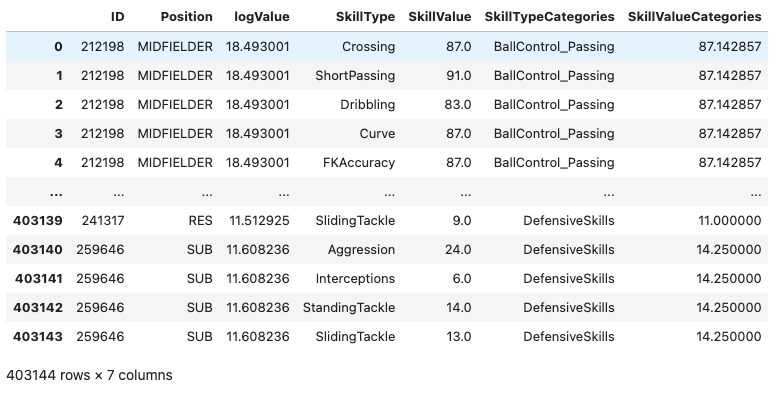

위의 자료를 바탕으로 `SkillValueCategories`와 `logValue`의 산점도를
포지션별로 시각화 하라.

**시각화 예시**

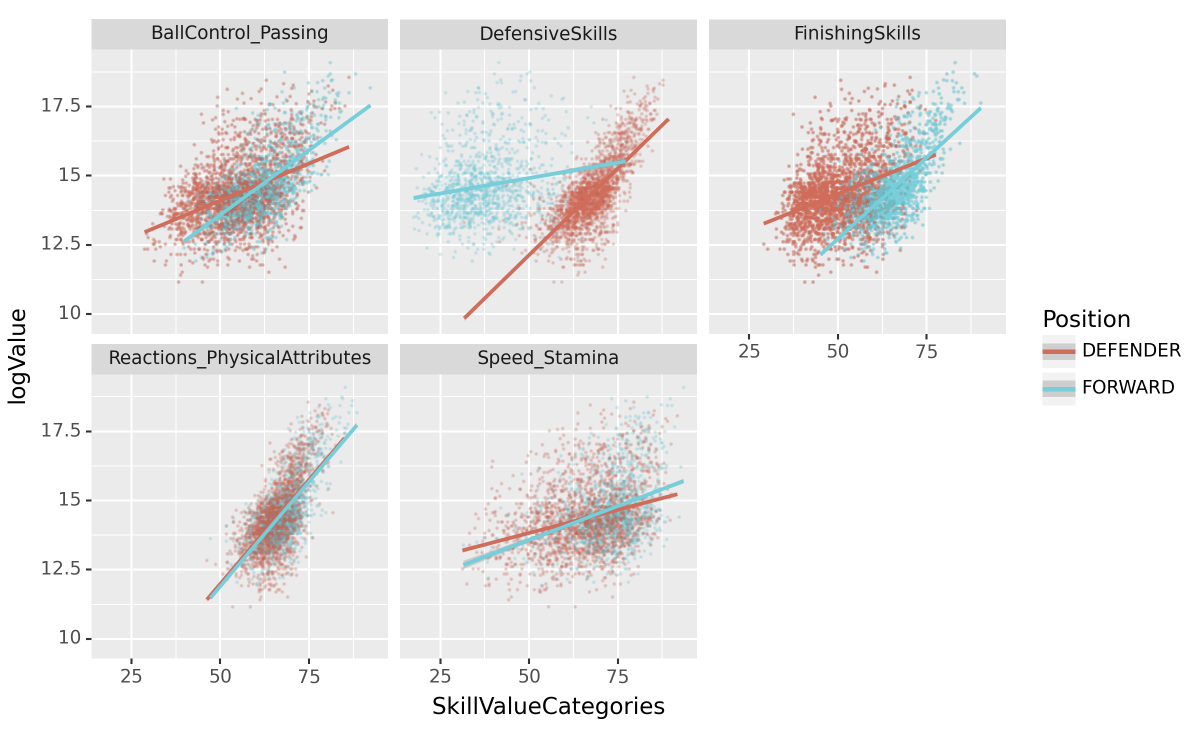

**힌트**

`-` 아래의 데이터프레임에서

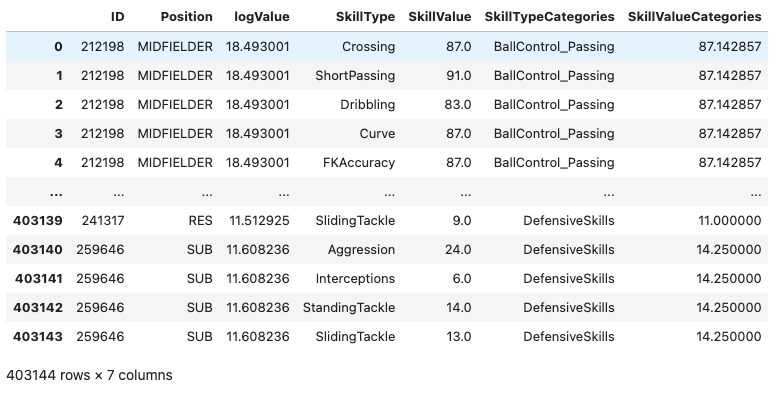

마지막 row의 SkillValueCategories의 값은 아래와 같이 구하였다.

$$14.250 = \frac{\text{259646선수의 Aggression}+\dots+\text{259646선수의 SlidingTackle}}{4}=\frac{24+6+14+13}{4} $$

In [106]:
(24+6+14+13)/4

`-` 시각화를 위해 아래의 코드를 참고하라.

``` python
fig = ggplot(tidydata.query("Position=='FORWARD' or Position=='DEFENDER'"))
point = geom_point(aes(x='SkillValueCategories',y='logValue',color='Position'),alpha=0.05,size=0.05)
smooth = geom_smooth(aes(x='SkillValueCategories',y='logValue',color='Position'))
facet = facet_wrap('SkillTypeCategories')
fig = (fig + point + smooth + facet).draw()
fig.set_dpi(150)
fig.set_size_inches(8,5)
fig
```

In [805]:
def map_abilities(abilities):
    for category, ab_list in abilities_categories.items():
        if abilities in ab_list:
            return category
    return 'UNKNOWN'

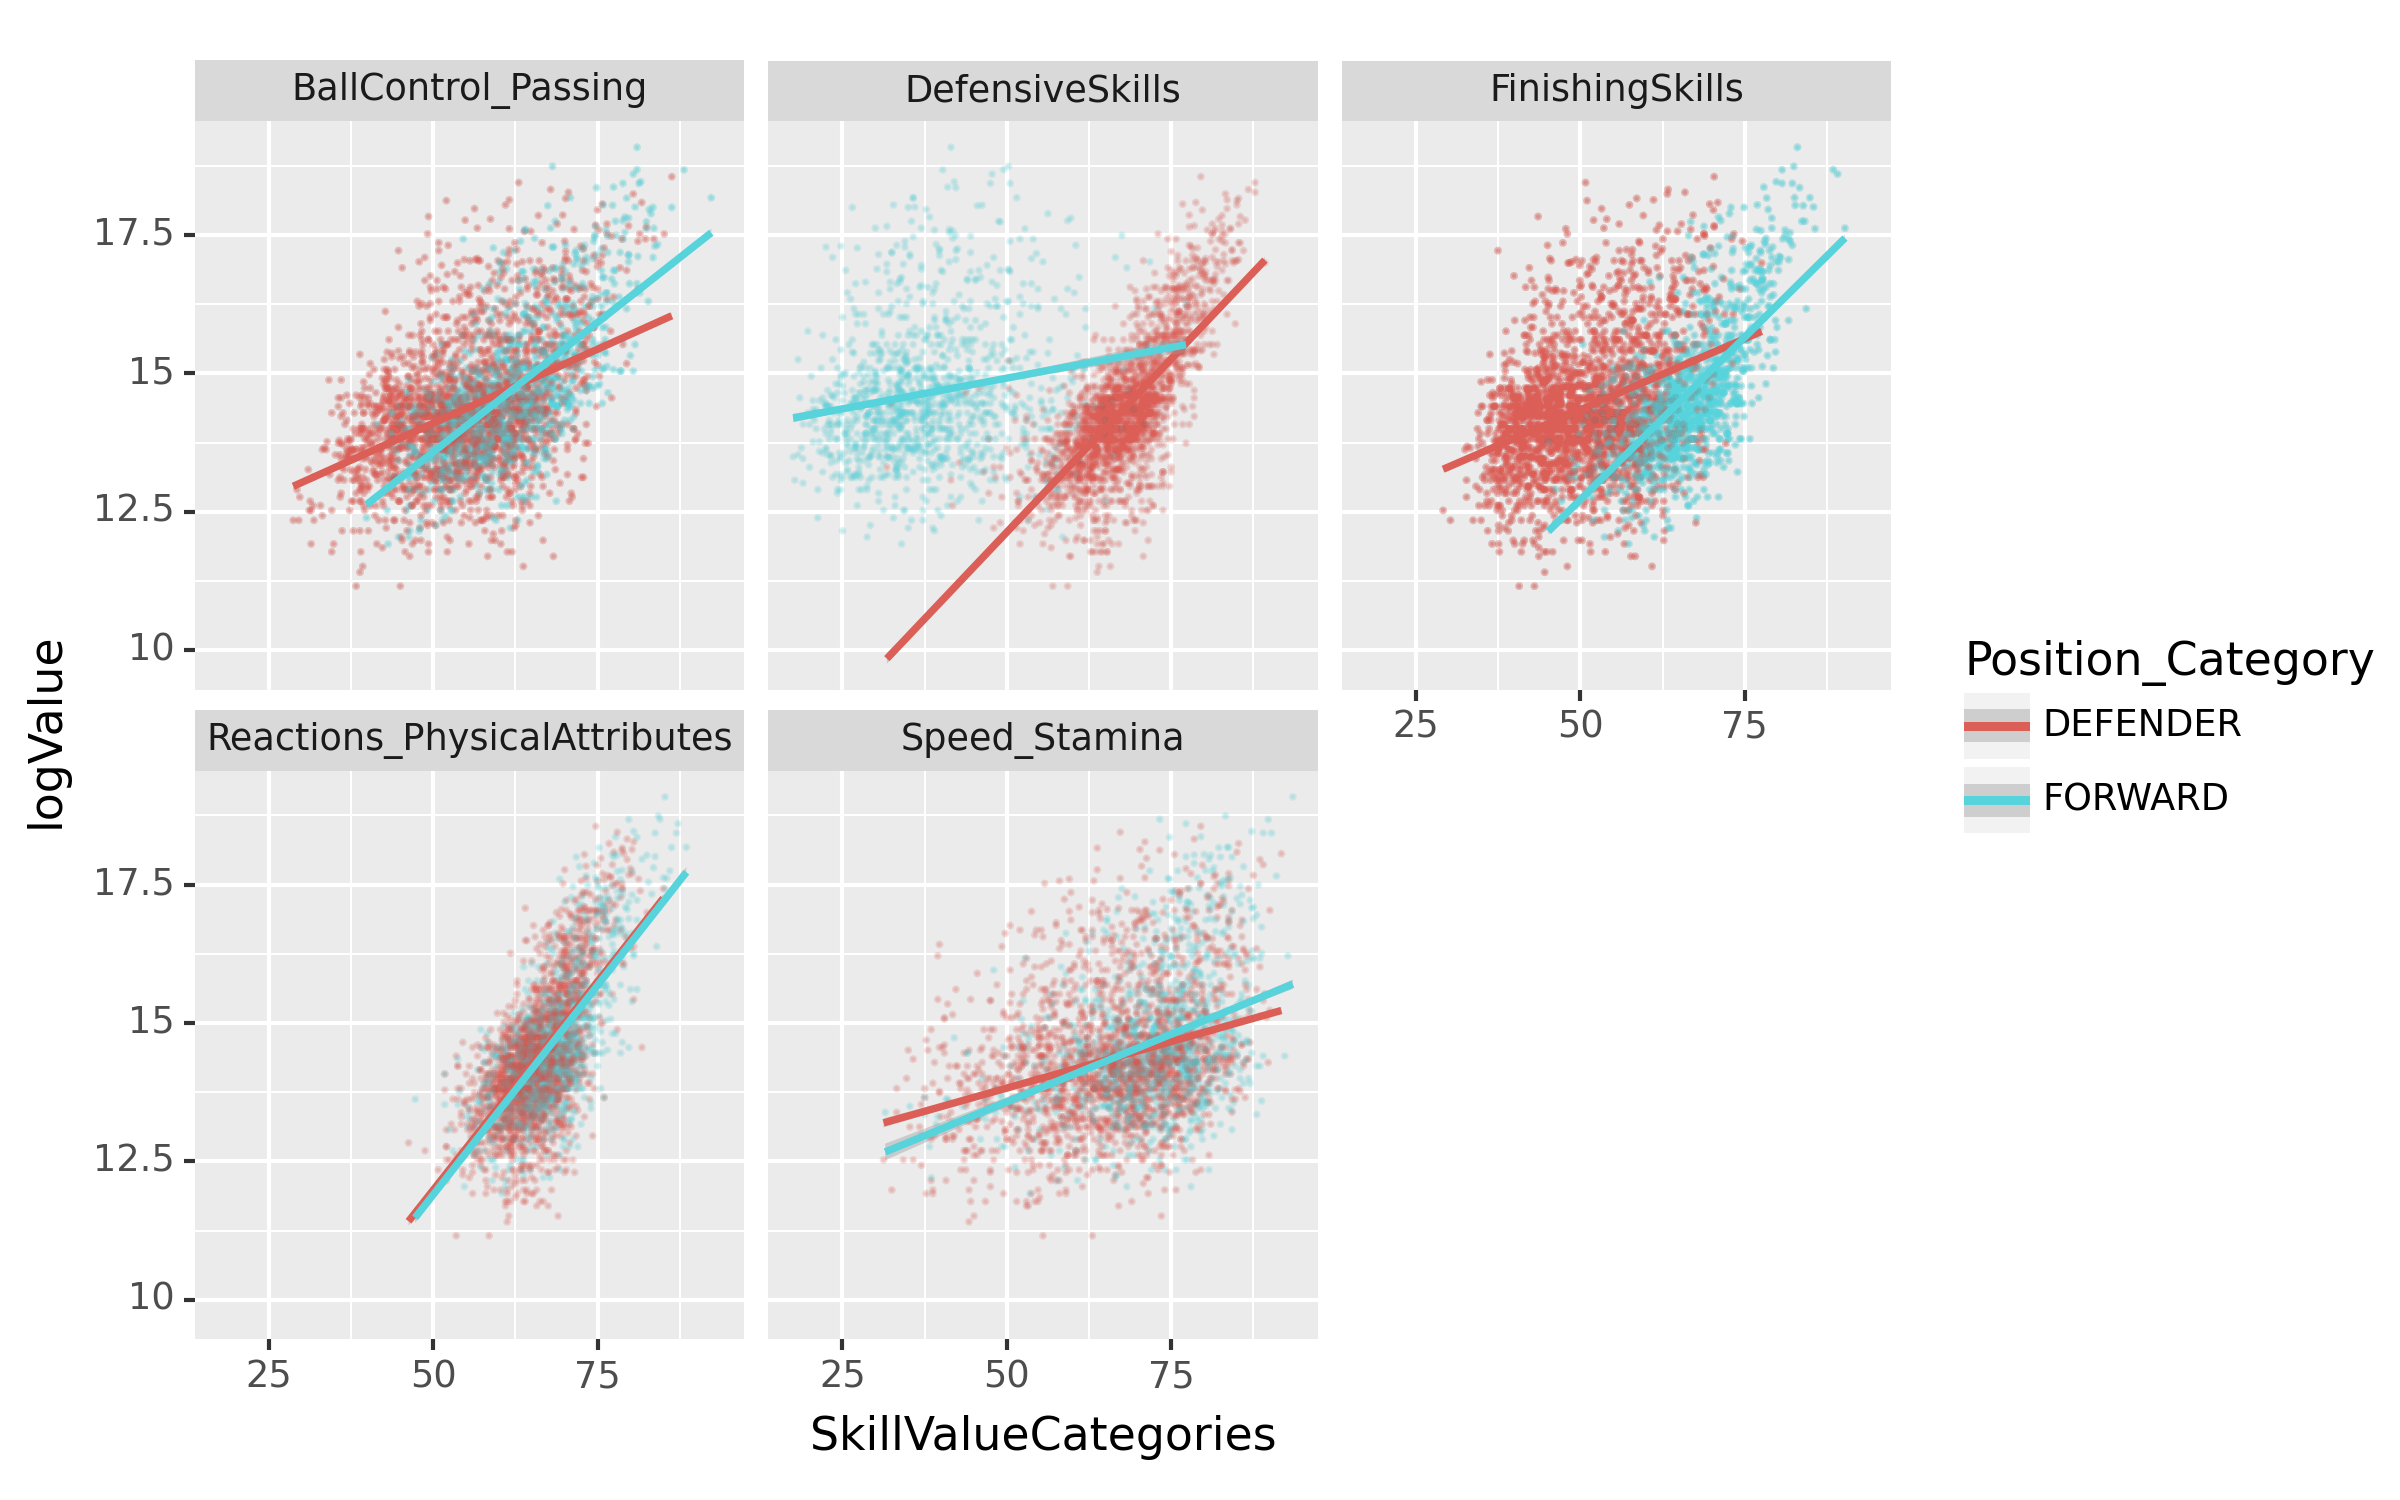

In [807]:
fig = ggplot(pd.melt(df.assign(logValue = np.log(df['Value'].str.split('€').str[1].str.strip().\
                            apply(lambda x: float(x.replace('€', '').strip()[:-1]) * 1000000 \
                                  if x.endswith('M') else float(x.replace('€', '').strip()[:-1]) * 1000 \
                                  if x.endswith('K') else float(x))),
          Position_Category = lambda x: x['Position'].str.split('>').str[1].str.strip().apply(map_position)).\
    query('Position_Category in ["DEFENDER","FORWARD"]')[['ID','Position_Category','logValue']+\
                         abilities_list],id_vars=['ID','Position_Category','logValue'],var_name='SkillType',value_name='SkillValue').\
    assign(SkillTypeCategories = lambda x: x['SkillType'].apply(map_abilities),\
            SkillValueCategories = lambda x: x.groupby(['ID','SkillTypeCategories'])['SkillValue'].transform('mean')))
point = geom_point(aes(x='SkillValueCategories',y='logValue',color='Position_Category'),alpha=0.05,size=0.05)
smooth = geom_smooth(aes(x='SkillValueCategories',y='logValue',color='Position_Category'))
facet = facet_wrap('SkillTypeCategories')
fig = (fig + point + smooth + facet).draw()
fig.set_dpi(150)
fig.set_size_inches(8,5)
fig

## `(5)` 스킬 카테고리별 선수의 로그 연봉 분석 – 25점

공격수 포지션을 가진 선수들의 특정 능력치가 그들의 Value에 얼마나 영향을
주는지 알아보고자 한다. 선수들의 logValue를 10개의 구간으로 나눈 후, 각
구간별로 \[‘FinishingSkills’,…,‘DefensiveSkills’\]의 통합능력치 평균을
바 플롯(bar plot)으로 시각화하라.

**시각화 예시**

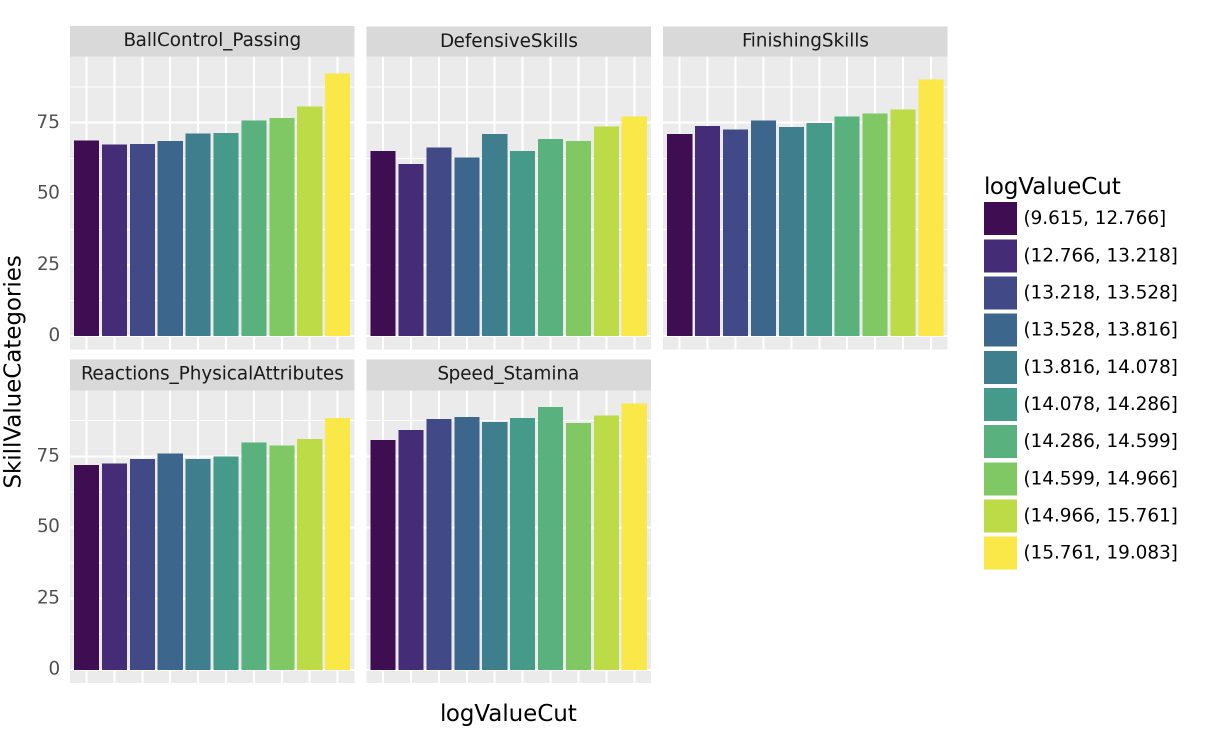

**세부지침**

`1`. `logValue`는 `pd.qcut`을 이용하여 분할하고 이때 `q=10`으로
설정하라.

`2`. 시각화를 위해 아래의 코드를 사용하라.

``` python
fig = ggplot(tidydata.query("Position=='FORWARD'")) 
col = geom_col(aes(x='logValueCut',y='SkillValueCategories',fill='logValueCut'),position='dodge')
facet = facet_wrap('SkillTypeCategories')
fig = (fig + col + facet + theme(axis_text_x=element_blank(), axis_ticks=element_blank())).draw()
fig.set_dpi(150)
fig.set_size_inches(8,5)
fig
```

In [835]:
pd.melt(df.assign(logValue = np.log(df['Value'].str.split('€').str[1].str.strip().\
                            apply(lambda x: float(x.replace('€', '').strip()[:-1]) * 1000000 \
                                  if x.endswith('M') else float(x.replace('€', '').strip()[:-1]) * 1000 \
                                  if x.endswith('K') else float(x))),
          Position_Category = lambda x: x['Position'].str.split('>').str[1].str.strip().apply(map_position),\
                 logValueCut =  lambda x : pd.qcut(x['logValue'],q = 10)).\
    query('Position_Category in ["FORWARD"]')[['ID','Position_Category','logValue','logValueCut']+\
                         abilities_list],id_vars=['ID','Position_Category','logValue','logValueCut'],var_name='SkillType',value_name='SkillValue').\
    assign(SkillTypeCategories = lambda x: x['SkillType'].apply(map_abilities),\
            SkillValueCategories = lambda x: x.groupby(['ID','SkillTypeCategories'])['SkillValue'].transform('mean'))

32144 rows × 8 columns

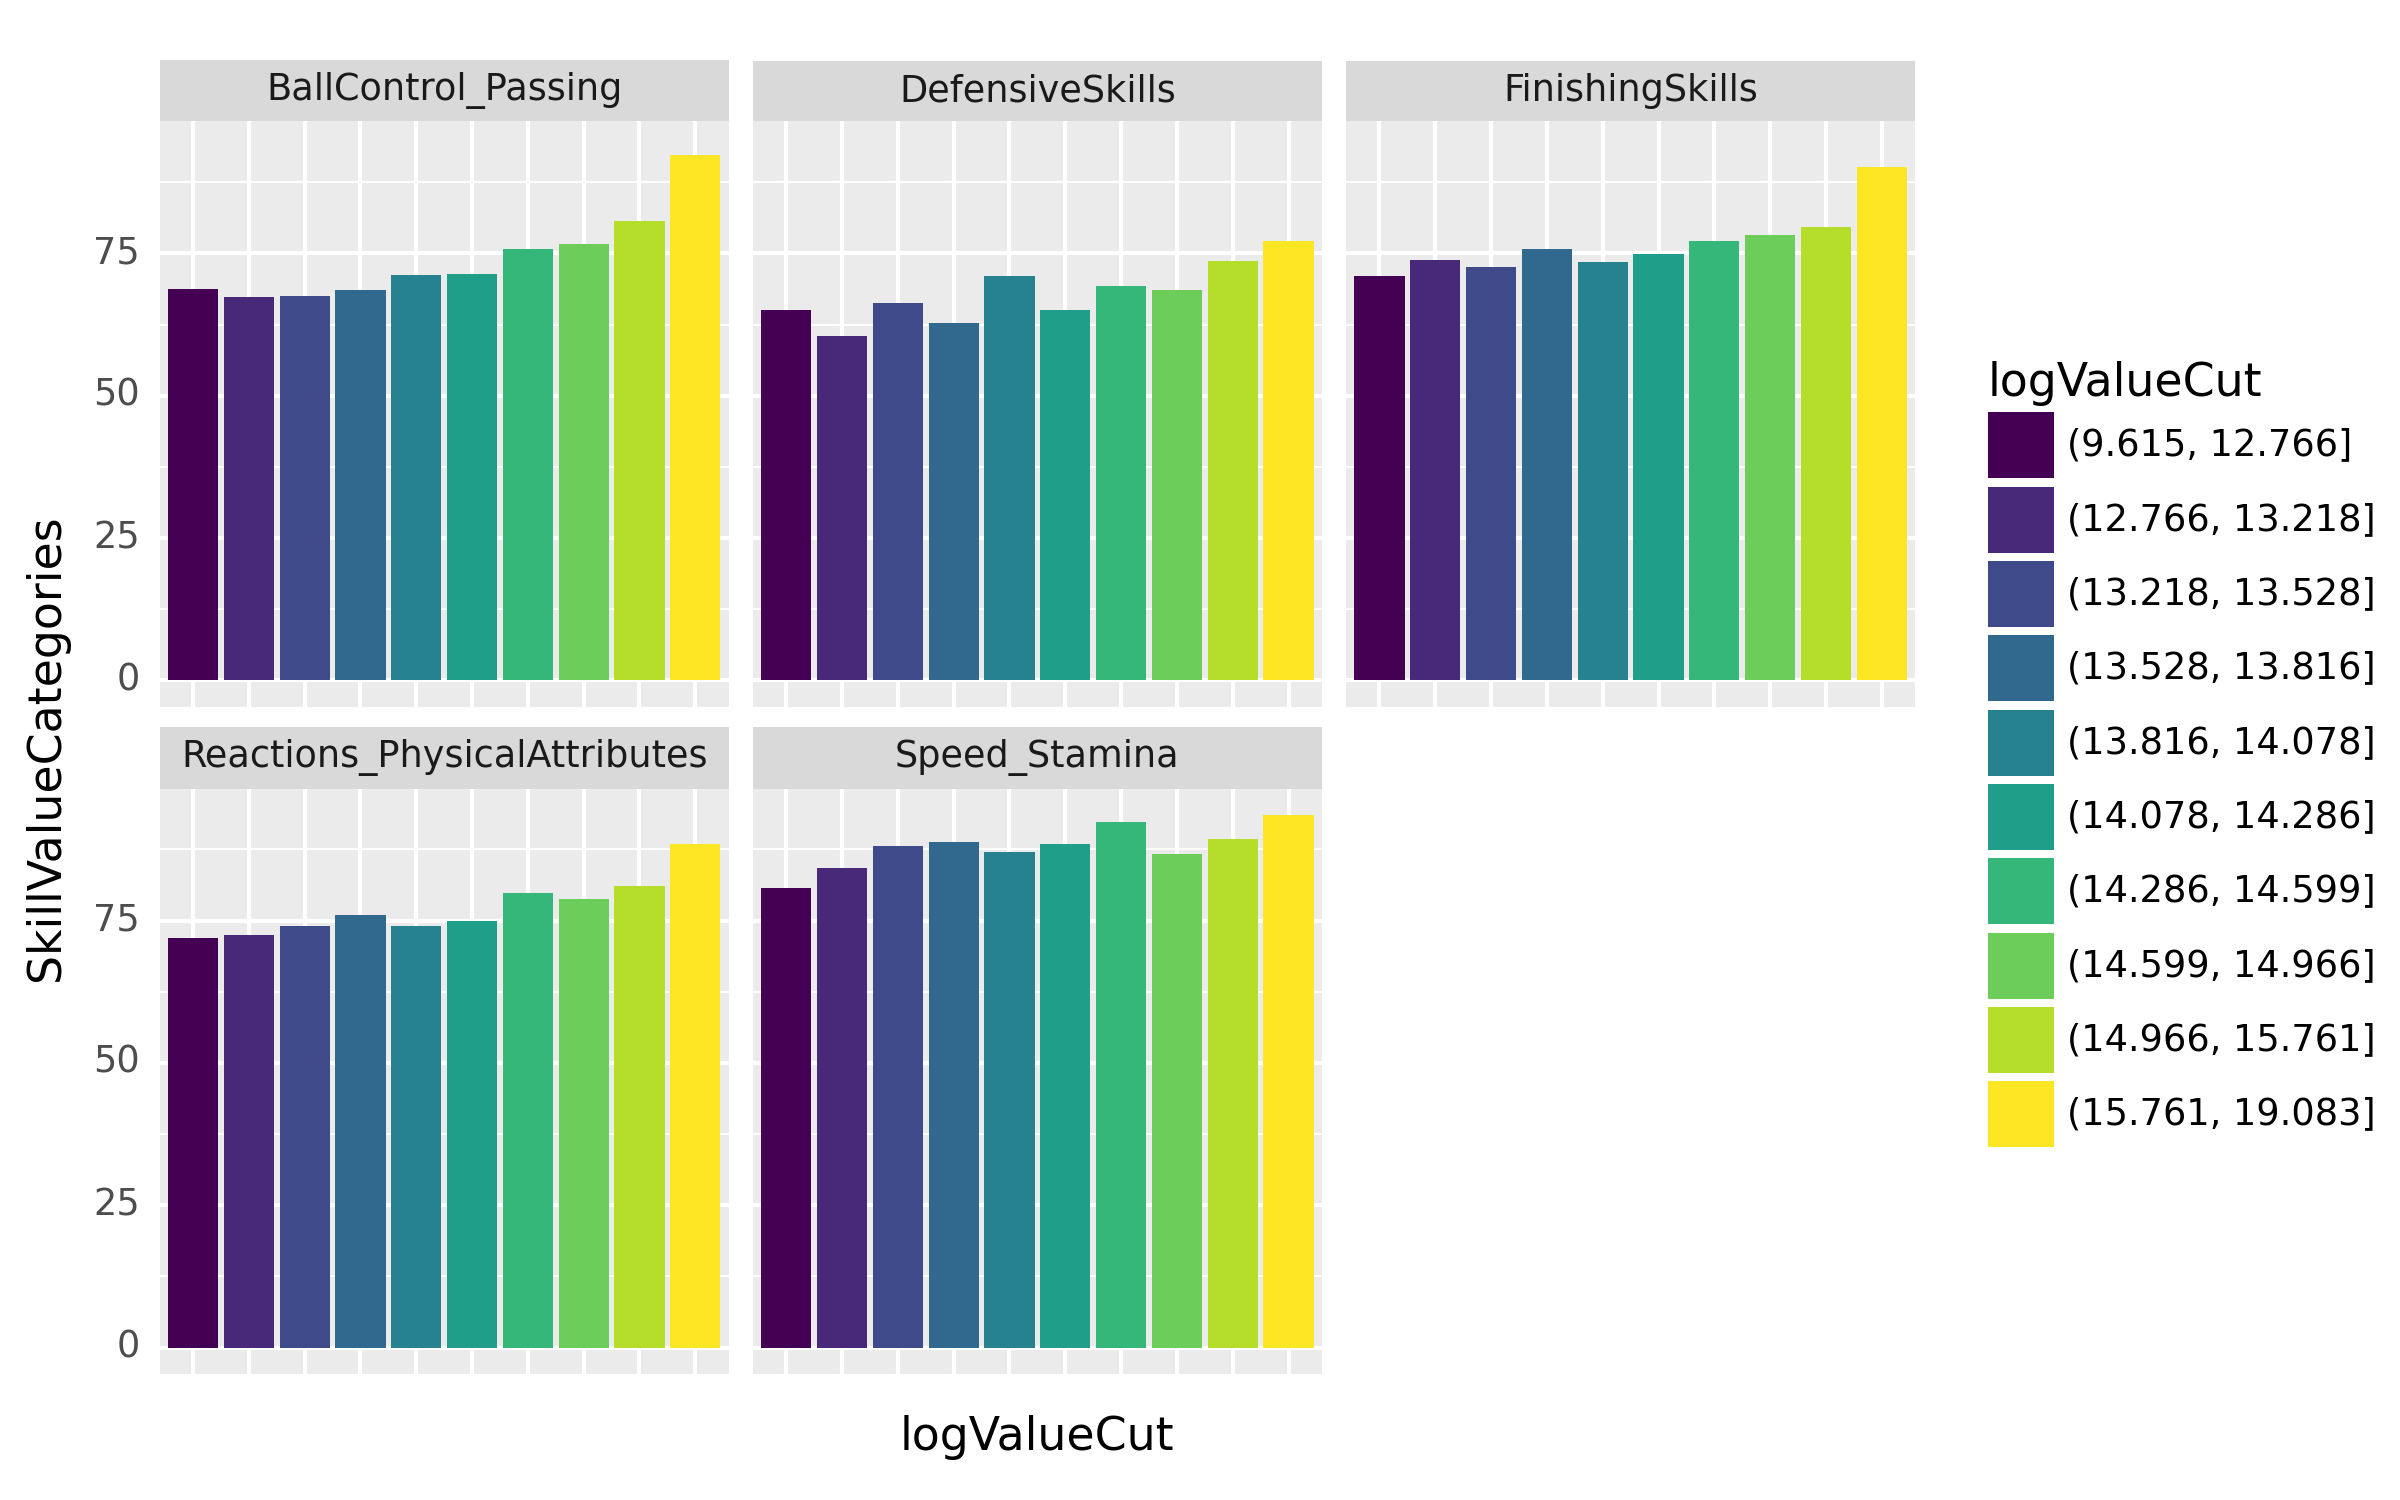

In [836]:
fig = ggplot(pd.melt(df.assign(logValue = np.log(df['Value'].str.split('€').str[1].str.strip().\
                            apply(lambda x: float(x.replace('€', '').strip()[:-1]) * 1000000 \
                                  if x.endswith('M') else float(x.replace('€', '').strip()[:-1]) * 1000 \
                                  if x.endswith('K') else float(x))),
          Position_Category = lambda x: x['Position'].str.split('>').str[1].str.strip().apply(map_position),\
                 logValueCut =  lambda x : pd.qcut(x['logValue'],q = 10)).\
    query('Position_Category in ["FORWARD"]')[['ID','Position_Category','logValue','logValueCut']+\
                         abilities_list],id_vars=['ID','Position_Category','logValue','logValueCut'],var_name='SkillType',value_name='SkillValue').\
    assign(SkillTypeCategories = lambda x: x['SkillType'].apply(map_abilities),\
            SkillValueCategories = lambda x: x.groupby(['ID','SkillTypeCategories'])['SkillValue'].transform('mean')))
col = geom_col(aes(x='logValueCut',y='SkillValueCategories',fill='logValueCut'),position='dodge')
facet = facet_wrap('SkillTypeCategories')
fig = (fig + col + facet + theme(axis_text_x=element_blank(), axis_ticks=element_blank())).draw()
fig.set_dpi(150)
fig.set_size_inches(8,5)
fig

# 3. 시각화의 해석 – 30점

## `(1)` 심슨의 역설 – 10점

다음은 농구선수 A,B 의 시즌별 자유투 성공률이다.

In [837]:
df = pd.DataFrame({
    'Player': ['A','A','A','A','B','B','B','B'], 
    'Season': [1,1,2,2]*2,
    'Status': ['Success','Failure']*4,
    'Count': [7,3,None,None,None,None,4,0]
})
df

적절한 값을 채워 시즌 1,2 모두 B선수의 자유투 성공률이 높지만 시즌1-2를
전체 합치면 A선수의 자유투 성공률이 더 높도록 하라. (즉 적절한 값을 채워
심슨의 역설을 설명하기 위한 자료를 구성하라.) 만들어진 자료를 바탕으로
심슨의 역설을 시각화하라. (즉 시즌별 자유투 성공률과 전체 자유투
성공률을 barplot으로 시각화하라)

## `(2)` Histogram Equalization – 5점

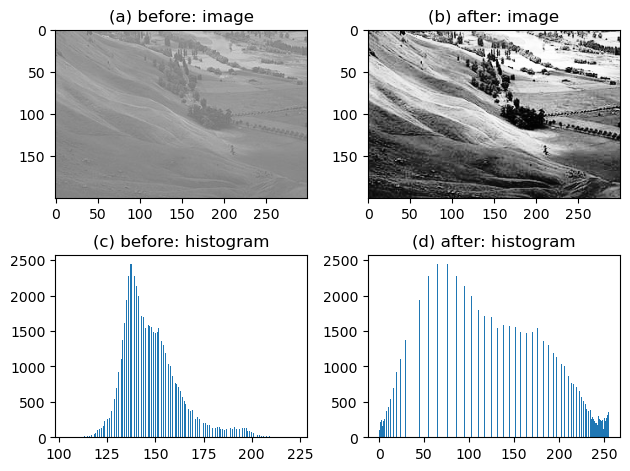

In [22]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Unequalized_Hawkes_Bay_NZ.jpg/300px-Unequalized_Hawkes_Bay_NZ.jpg'
img_before = np.array(PIL.Image.open(io.BytesIO(requests.get(url).content)))
img_after = cv2.equalizeHist(img_before)
fig,ax = plt.subplots(2,2)
ax[0,0].imshow(img_before,cmap='gray',vmax=255,vmin=0); ax[0,0].set_title("(a) before: image")
ax[0,1].imshow(img_after,cmap='gray',vmax=255,vmin=0); ax[0,1].set_title("(b) after: image")
ax[1,0].hist(img_before.reshape(-1), bins=255); ax[1,0].set_title("(c) before: histogram")
ax[1,1].hist(img_after.reshape(-1), bins=255); ax[1,1].set_title("(d) after: histogram")
fig.tight_layout()

위의 그림을 올바르게 해석한 사람을 모두 고르라. (모두 맞출 경우만
정답으로 인정)

-   유진: (a) 이미지의 값들은 (b) 이미지의 값들 보다 분산이 작을 것이다.
-   레이: (a) 이미지의 값은 대부분 130~150근처에 모여있어서 회색으로
    보인다.
-   원영: 130~150 사이의 값들은 (b) 이미지 보다 (a) 이미지에서 훨씬 많은
    빈도로 나타난다.
-   리즈: (a) 이미지를 (b) 이미지로 바꾸는 기법을 histogram equalization
    이라고 하며, 그 원리는 (c)와 같은 히스토그램을 (d)와 같은
    히스토그램으로 바꾸는 것이다.

## `(3)` 엔스콤의 플랏 – 5점

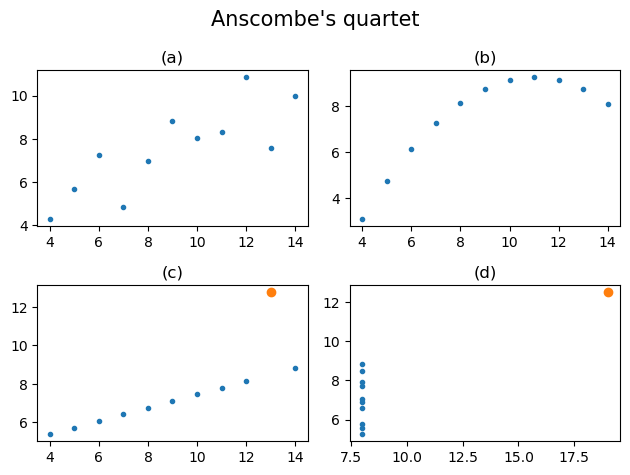

In [24]:
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.plot(x,y1,'.') 
ax1.set_title("(a)")
ax2.plot(x,y2,'.') 
ax2.set_title("(b)")
ax3.plot(x,y3,'.'); ax3.plot(x[2],y3[2],'o',color='C1') 
ax3.set_title("(c)")
ax4.plot(x4,y4,'.'); ax4.plot(x4[-4],y4[-4],'o',color='C1')
ax4.set_title("(d)")
fig.suptitle("Anscombe's quartet",size=15)
plt.tight_layout()

위의 그림을 올바르게 해석한 사람을 모두 고르라. (모두 맞출경우만
정답으로 인정)

-   유진: (a)-(d) 모두 양의 상관계수를 가진다.
-   레이: 이 중 상관계수값의 해석이 가장 적절한 자료는 (a)이다.
-   원영: (b)가 적절하지 않은 이유는 선형성이 가정되어 있지 않기
    때문이며, (c)가 적절하지 않은 이유는 주황색점으로 표시된 점이
    계수값을 크게 바꾸기 때문이다.
-   리즈: (d)의 경우 주황색점의 값 $(x,y)$을 $(-x,y)$로 바꾸게 된다면
    상관계수의 부호가 음수가 될 것이다.

## `(4)` 아이스크림을 많이 먹으면 걸리는 병 – 5점

/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence i

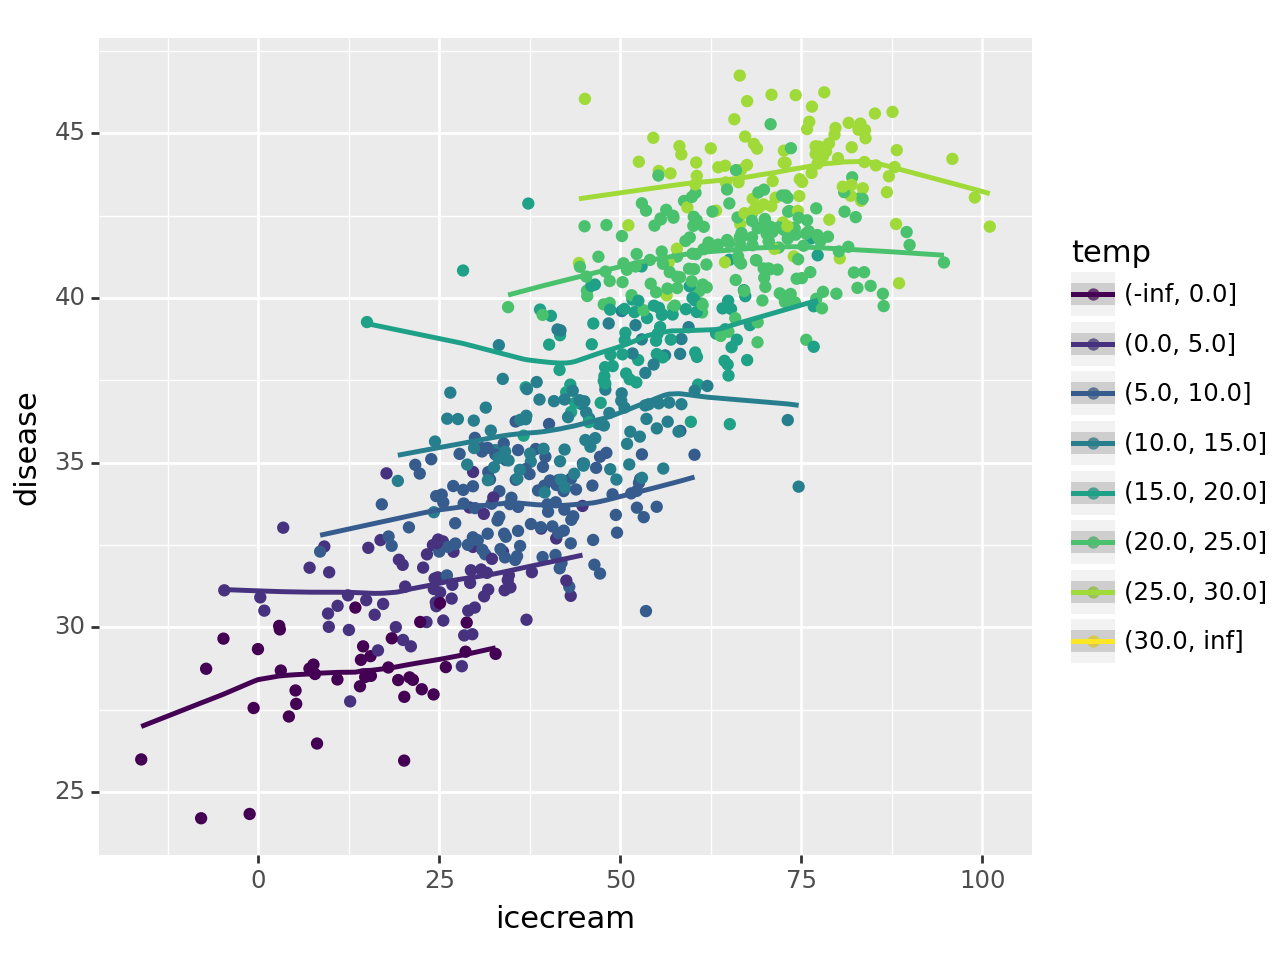

In [26]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/icecream.csv')
ggplot(data=df.assign(temp=pd.cut(df.temp,[-np.inf,0,5,10,15,20,25,30,np.inf])))\
+geom_point(aes(x='icecream',y='disease',color='temp'))\
+geom_smooth(aes(x='icecream',y='disease',color='temp'))

아래의 그림을 보고 올바르게 해석한 사람을 모두 고르라. (모두 맞출경우만
정답으로 인정)

> 그림에 대한 배경설명은 강의노트 “아이스크림을 많이 먹으면 걸리는 병”을
> 참고

-   원영: (아이스크림 판매량, 소아마비 반응수치)의 상관계수값은
    양수이다.
-   가을: 온도를 통제하였을 경우 (아이스크림 판매량, 소아마비
    반응수치)의 상관계수값은, 온도를 통제하지 않았을 경우 (아이스크림
    판매량, 소아마비 반응수치)의 상관계수 값보다 작다.
-   이서: (온도, 소아마비 반응수치)의 상관계수 값은 양수이다.
-   레이: (온도, 아이스크림 판매량)의 상관계수 값은 양수이다.
-   유진: 온도가 유일한 은닉변수라면, 아이스크림 판매량과 소아마비
    반응수치 사이에는 인과성이 없다고 볼 수 있다.

## `(5)` 산점도의 해석들 – 5점

아래는 `문제 4`에 제시된 산점도와 그 해석들이다. 옳은 해석을 모두
골라라.

> 답: 해석1, 해석2, 해석3

-   해석4가 틀린이유: 상관계수가 0근처라면 FinishingSkill의 붉은
    추세선이 x축과 거의 평행해야 한다.

**4-(1)**

<figure>
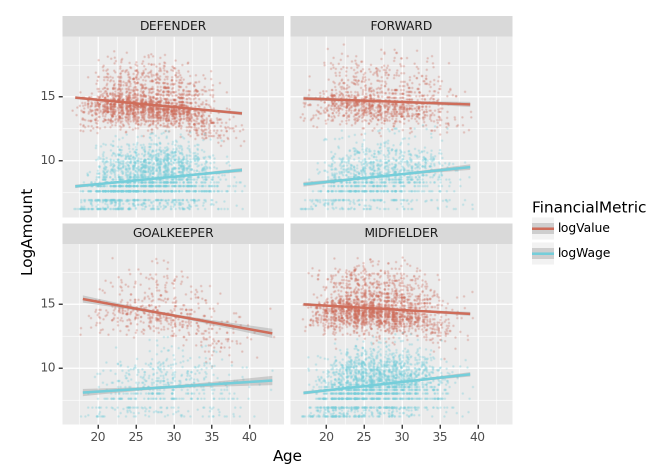
<figcaption aria-hidden="true">4-(1)의 그림</figcaption>
</figure>

`해석1`: 모든 포지션에 대하여, (Age,logValue)는 음의 상관계수값을 가지며
(Age,logWage)는 양의 상관계수값을 가진다.

**4-(2)**

<figure>
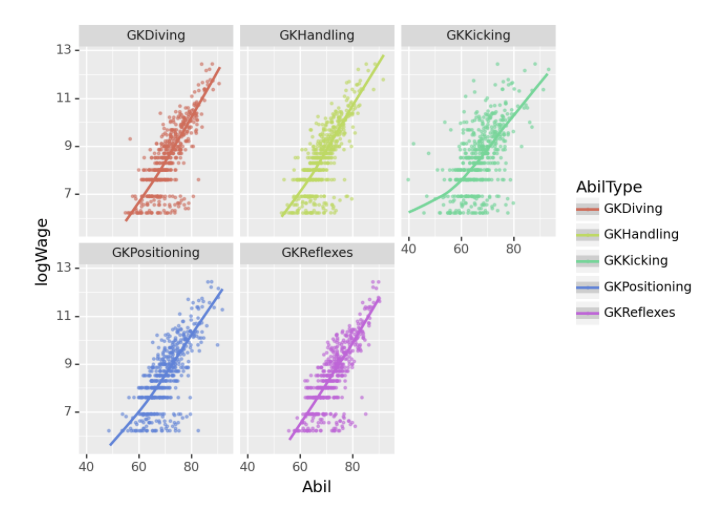
<figcaption aria-hidden="true">4-(2)의 그림</figcaption>
</figure>

`해석2`: \[GKDiving,…,GKReflexes\]는 모두 logWage와 양의 상관계수값을
가진다.

**4-(3)**

<figure>
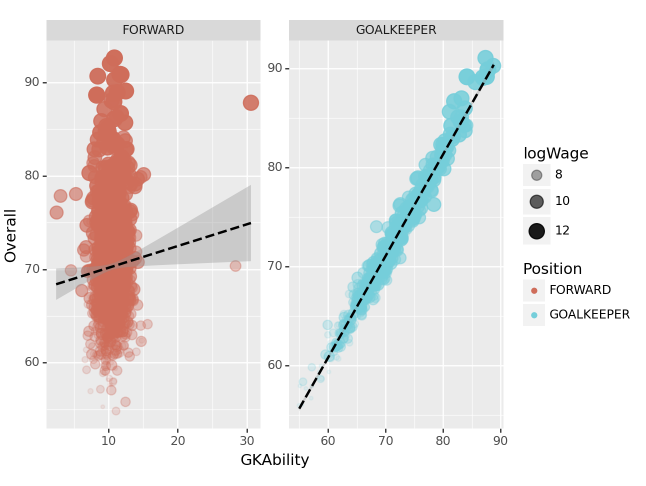
<figcaption aria-hidden="true">4-(3)의 그림</figcaption>
</figure>

`해석3`: GOALKEEPER 포지션의 경우 GKAbility를 이용하여 Overall을
추정하는 것이 합리적이지만 FORWARD 포지션의 경우 GKAbility를 이용하여
Overall을 추정하는 것은 합리적이지 않다.

**4-(4)**

<figure>
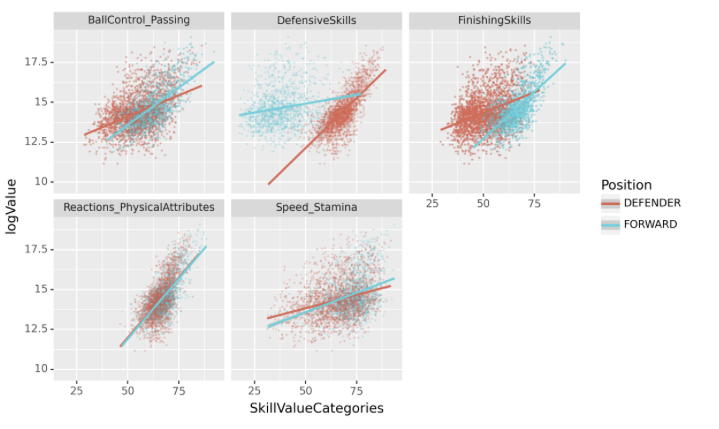
<figcaption aria-hidden="true">4-(4)의 그림</figcaption>
</figure>

`해석4`: 수비수 포지션의 경우 FinishingSkills 과 logValue 사이의
상관계수 값은 거의 0에 가깝다.